## **Predicting cardiovascular diseases**

### **About the Dataset**


**Data description**

There are 3 types of input features:

- Objective: factual information;

- Examination: results of medical examination;

- Subjective: information given by the patient.

**Features:**

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

The dataset that we are going to deal with is the Cardiovascular Disease dataset

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

**This crash course will walk through**

- Checking for outliers and missing data

- Creating hypotheses to test relationships between variables

- Feature engineering to create new variables

- Exploratory data analysis to understand relationships between variables

- Multivariate analysis to understand correlations between variables

- Data preprocessing, including encoding categorical data and scaling numerical variables

- Machine learning modeling, including balancing data and training models

- Tuning the best model using hyperparameter tuning and evaluating performance



Currently, the diagnosis of cardiovascular disease is conducted manually by a team of specialists, with an accuracy ranging between 55% to 65%. The complexity of the diagnosis and the need to minimize the risks due to fatigue, which results from the analysts taking turns, contribute to this variation. The cost associated with each diagnosis, which includes devices and payroll of the analysts, is approximately $1,000.

The client is charged for the diagnosis based on the level of precision achieved by the team of specialists.

- If the precision is above 50%, the minimum cost will be $500,

with an additional $500 added for every additional 5% precision.

- For instance, a precision of 55% will result in a cost of $1,000.

- If the precision is up to 50%, the cost will be zero.

Thus, the different values of exam precision determined by the team of specialists can make the operation profitable (revenue greater than the cost) or result in a loss (revenue less than the cost). This unpredictability in the diagnosis contributes to an unstable cashflow for the company.

### **Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import sys

sys.path.append('/content/drive/MyDrive/Project')

In [ ]:
!pip install pyitlib



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 53.5 MB/s eta 0:00:00
  Created wheel for pyitlib: filename=pyitlib-0.2.3-py3-none-any.whl size=29366 sha256=d482f892e346cd0fd4cfbaeed8e64456b2df6095022d155339a2d3edbec04fd2
  Stored in directory: /root/.cache/pip/wheels/c4/d1/dc/ac69412c0dc60ee3fc207f07b6f15abda55c70b7b3e96315aa
Successfully built pyitlib
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.
imbalanced-learn 0.10.1 requires scikit-

In [ ]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.0 MB/s eta 0:00:00


In [ ]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyitlib 0.2.3 requires scikit-learn<=0.24,>=0.16.0, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
pip install --upgrade imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# general utilities
from GeneralUtils import GeneralUtils
import pickle

# data manipulation
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# feature selection
from sklearn.ensemble import ExtraTreesClassifier

# machine learning
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# algorithms
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import classification_report, cohen_kappa_score, roc_curve, brier_score_loss

# model calibration
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

In [ ]:
# instantiates the utilities object
gu = GeneralUtils()

# disable max columns limit
pd.set_option('display.max_columns', 70)

# sets to not crop long vlaues for rows
pd.set_option("display.max_colwidth", 70)

# sets format to suppress scientific notation
pd.options.display.float_format = '{:,.6f}'.format

# sets seaborn default style
sns.set()

# sets global SEED
SEED = 42

### **Loading the data set**

In [ ]:
import pandas as pd

In [ ]:
#Reading the cardio dataset
df_ccd_raw = pd.read_csv('cardio.csv', sep=';')

df_ccd_raw.head() returns the first few rows of a Pandas DataFrame df_ccd_raw.

By default, head() shows the first 5 rows of the DataFrame, but this can be changed by passing a different number as an argument.

In [ ]:
df_ccd_raw.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0


Displays the number of rows and columns in the dataset, the name of each column, the count of non-null values in each column, and the data type of each column.

It is a quick way to get an idea of the structure and completeness of the dataset.

In [ ]:
# checks the data set info
df_ccd_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# converts days to years
df_ccd_raw['age_years'] = df_ccd_raw['age'].apply(lambda x: x/365)
df_ccd_raw.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0,47.873973


### **Descriptive statistics**

The resulting statistics are stored in a variable called summary_stats. These statistics include measures such as mean, median, standard deviation, minimum and maximum values, quartiles, and other relevant information for each column in the dataset.

This information will be useful for understanding the distribution and range of values in the dataset and for making informed decisions about how to analyze or visualize the data.

**Statistical measures**

**Mean**: The mean is a measure of central tendency and is calculated by adding up all the values in a dataset and dividing by the number of values. The mean can be affected by extreme values or outliers.

**Median**: The median is another measure of central tendency and is the middle value in a dataset when the values are arranged in order. The median is less affected by extreme values than the mean.

**Standard Deviation**: The standard deviation is a measure of how spread out the data is from the mean. A higher standard deviation indicates that the data is more spread out, while a lower standard deviation indicates that the data is more tightly clustered around the mean.

**Minimum and Maximum Values**: The minimum and maximum values are the smallest and largest values in a dataset, respectively.

**Quartiles**: Quartiles divide the data into four equal parts, with each quartile containing 25% of the data. The first quartile (Q1) represents the 25th percentile, the second quartile (Q2) represents the median, and the third quartile (Q3) represents the 75th percentile.



In [ ]:
# gets the descriptive statistics from the data set
summary_stats = gu.get_descriptive_statistics(data_set=df_ccd_raw)
summary_stats

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,id,0.000000,"99,999.000000","99,999.000000","49,972.419900","50,001.500000","28,851.096242",-0.001278,-1.198374
1,age,"10,798.000000","23,713.000000","12,915.000000","19,468.865814","19,703.000000","2,467.234044",-0.307055,-0.823447
2,gender,1.000000,2.000000,1.000000,1.349571,1.000000,0.476835,0.630960,-1.601935
3,height,55.000000,250.000000,195.000000,164.359229,165.000000,8.210068,-0.642187,7.943653
4,weight,10.000000,200.000000,190.000000,74.205690,72.000000,14.395654,1.012070,2.586825
5,ap_hi,-150.000000,"16,020.000000","16,170.000000",128.817286,120.000000,154.010319,85.296214,"7,580.074738"
6,ap_lo,-70.000000,"11,000.000000","11,070.000000",96.630414,80.000000,188.471184,32.114083,"1,425.914585"
7,cholesterol,1.000000,3.000000,2.000000,1.366871,1.000000,0.680245,1.587123,0.993901
8,gluc,1.000000,3.000000,2.000000,1.226457,1.000000,0.572266,2.397462,4.294377
9,smoke,0.000000,1.000000,1.000000,0.088129,0.000000,0.283482,2.905867,6.444250


#### **Data preprocessing**



**Data Cleaning** : This step involves identifying and removing any irrelevant, incomplete, or inconsistent data. This can include removing duplicates, filling in missing values, and correcting any errors or inconsistencies in the data.

**Data Transformation** : This step involves converting the data into a format that is suitable for analysis. This can include scaling or normalizing the data to make it easier to compare, or transforming the data to reduce noise or remove outliers.

**Data Integration** : If you have multiple datasets, this step involves combining them into a single dataset. This can be done by matching records based on common variables or merging datasets with similar variables.

**Data Reduction** : This step involves reducing the size of the dataset to make it more manageable for analysis. This can include removing variables that are not relevant or reducing the number of observations in the dataset.

**Data Discretization** : This step involves converting continuous variables into discrete variables. This can be useful for analysis or machine learning algorithms that require discrete variables.

**Data Sampling** : This step involves selecting a subset of the data for analysis. This can be useful for large datasets where analyzing the entire dataset may be impractical.

**Data Formatting** : This step involves formatting the data to ensure that it is compatible with the tools and software being used for analysis. This can include converting the data into a specific file format or structure.

The above steps can ensure that the data is clean, accurate, and suitable for further analysis.






### **Checking outliers**


#### **Skewness and kurtosis**

We check outliers by skewness and kurtosis to identify unusual or extreme observations in the data that may affect the overall analysis.

Skewness measures the asymmetry of the data distribution while kurtosis measures the degree of outliers or extreme values in the data.

By identifying these outliers, we can determine whether they are errors in the data or legitimate observations that should be included in the analysis. We can then decide whether to exclude them or account for them in the analysis to avoid any potential bias.

Skewness and kurtosis are measures of the shape of the distribution of a dataset.

- Skewness measures the degree of asymmetry in the dataset.
- While kurtosis measures the degree of peakedness of the distribution.

When checking for outliers by skewness and kurtosis, we are looking for extreme values in the dataset that fall outside of what we would expect based on the shape of the distribution.

A high skewness value indicates that the distribution is heavily skewed to one side, while a high kurtosis value indicates a very peaked distribution with most of the data clustered around the mean.

If we identify extreme values based on skewness and kurtosis, we can further investigate these values to determine if they are truly outliers or if they are valid data points.

This code takes the descriptive statistics generated earlier and further classifies each variable based on its skewness and kurtosis.

- Skewness tells us how much a distribution is leaning towards one side, while kurtosis tells us how much a distribution has extreme values compared to a normal distribution.

- Two new columns - 'skewness_class' and 'kurtosis_class' are created, and assigns each variable to a certain category based on its skewness and kurtosis values.

- For example, a variable with a skewness value between -0.5 and 0.5 is classified as "nearly symmetric", while a variable with a kurtosis value greater than 0 is classified as having "heavy tails". The resulting summary_stats dataframe shows each variable and its corresponding skewness and kurtosis classifications.

In [ ]:
# classifies skwewness
summary_stats['skwewness_class'] = summary_stats['skewness'].apply(lambda x:
                                                                   'nearly symmetric' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5)))
                                                                   else 'moderately skewed' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0)))
                                                                   else 'highly skewed')

# classifies kurtosis
summary_stats['kurtosis_class'] = summary_stats['kurtosis'].apply(lambda x:
                                                                 'heavy tails' if (x > 0)
                                                                 else 'light tails')

# checks operations
summary_stats

,attributes,min,max,range,mean,median,std,skewness,kurtosis,skwewness_class,kurtosis_class
0,id,0.000000,"99,999.000000","99,999.000000","49,972.419900","50,001.500000","28,851.096242",-0.001278,-1.198374,nearly symmetric,light tails
1,age,"10,798.000000","23,713.000000","12,915.000000","19,468.865814","19,703.000000","2,467.234044",-0.307055,-0.823447,nearly symmetric,light tails
2,gender,1.000000,2.000000,1.000000,1.349571,1.000000,0.476835,0.630960,-1.601935,moderately skewed,light tails
3,height,55.000000,250.000000,195.000000,164.359229,165.000000,8.210068,-0.642187,7.943653,moderately skewed,heavy tails
4,weight,10.000000,200.000000,190.000000,74.205690,72.000000,14.395654,1.012070,2.586825,highly skewed,heavy tails
5,ap_hi,-150.000000,"16,020.000000","16,170.000000",128.817286,120.000000,154.010319,85.296214,"7,580.074738",highly skewed,heavy tails
6,ap_lo,-70.000000,"11,000.000000","11,070.000000",96.630414,80.000000,188.471184,32.114083,"1,425.914585",highly skewed,heavy tails
7,cholesterol,1.000000,3.000000,2.000000,1.366871,1.000000,0.680245,1.587123,0.993901,highly skewed,heavy tails
8,gluc,1.000000,3.000000,2.000000,1.226457,1.000000,0.572266,2.397462,4.294377,highly skewed,heavy tails
9,smoke,0.000000,1.000000,1.000000,0.088129,0.000000,0.283482,2.905867,6.444250,highly skewed,heavy tails


As observed, there are features presenting a distribution that is highly skewed with heavy tails.

This means that there is more data that is far from the mean.

This could be a sign of outliers in the data for these features.

#### **Scatterplot**

A scatterplot is a type of graph that allows us to visualize the relationship between two numerical variables.

In other words, it is used to see if there is a pattern or a correlation between two sets of data.

For example, we can use a scatterplot to see if there is a relationship between a person's height and their weight. By plotting these two variables on the graph, we can see if there is a general trend or pattern between the two.

Scatterplots are helpful because they allow us to quickly visualize the relationship between two variables, and can help us identify any outliers or unusual data points that may need to be investigated further.

This code creates a scatterplot of data that shows how height and weight are related to each other. The dots on the plot represent individual people in the data, and their size and color represent their age.

The x-axis represents height in centimeters, while the y-axis represents weight in kilograms.

The plot is created using the seaborn library, and the colors used are from a rainbow palette. The plot is also given a title and axis labels to make it more clear.

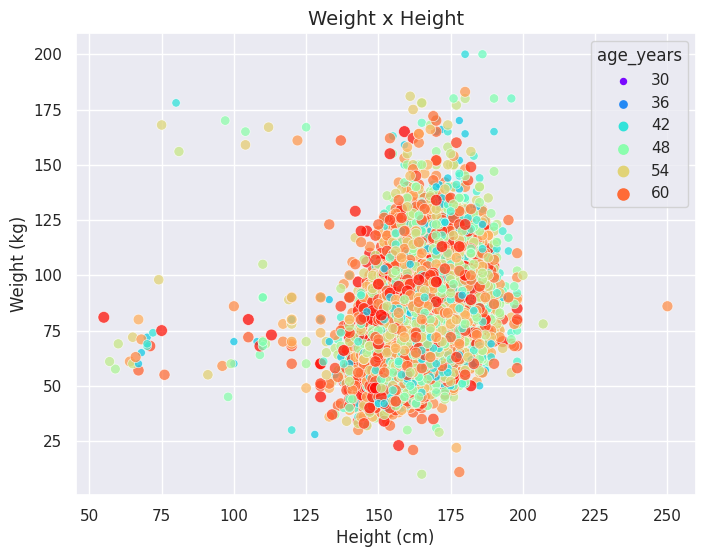

In [ ]:
# sets plot size
plt.figure(figsize=(8,6))

# plots scatterplot
sns.scatterplot(x='height', y='weight', data=df_ccd_raw, hue='age_years', palette='rainbow', size='age_years', alpha=0.75)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Height", fontsize=14)

# displays the plot
plt.show()

As observed, there are outliers in the data set due to:

- weight ~90 kg and height 250 cm

- All data points below 25 kg and ages ranging from 45 to 75 years

- All data points up to 100 kg and height up to 75 cm (this might be a dwarf cluster)

- Points between 180 kg and 150 kg and height up to 125 cm

This code is creating two scatterplots side by side on the same plot.

The left plot shows how height changes with age, with each dot representing a person in the dataset.
The color of the dot indicates the weight of the person, and the size of the dot also represents the weight.

The right plot shows how weight changes with age, with each dot representing a person in the dataset.
The color of the dot indicates the height of the person, and the size of the dot also represents the height.
This plot helps us to visualize how height and weight change with age and how they relate to each other.






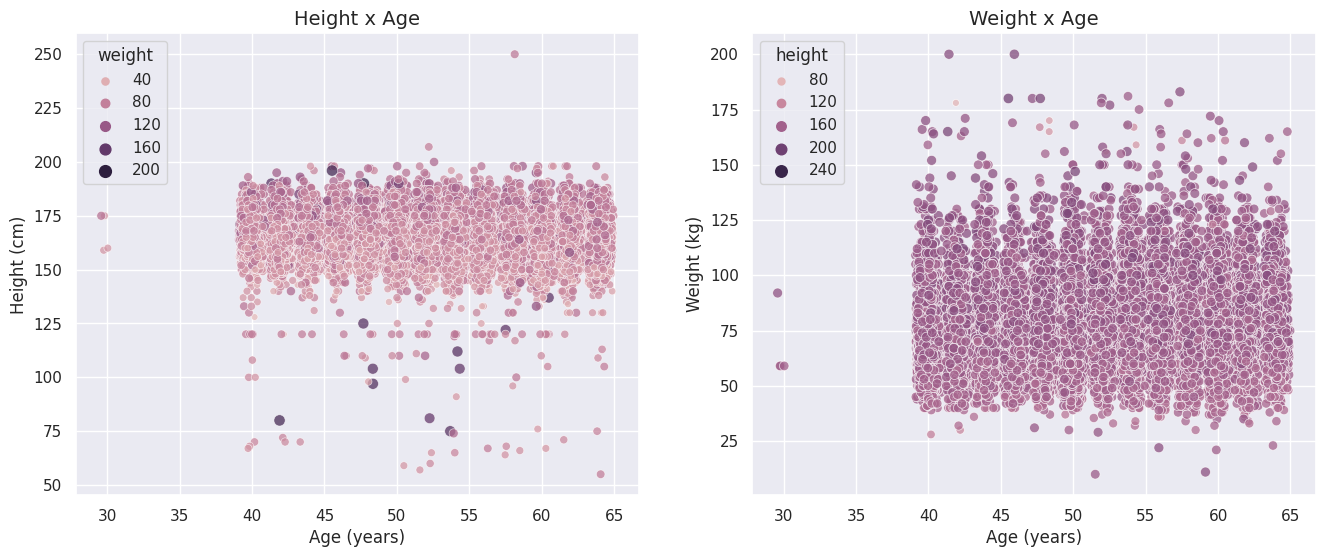

In [ ]:
# sets plot size
plt.figure(figsize=(16,6))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age_years', y='height', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.title("Height x Age", fontsize=14)

# plots scatterplot
plt.subplot(1,2,2)
sns.scatterplot(x='age_years', y='weight', data=df_ccd_raw, hue='height', size='height', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Age", fontsize=14)

# displays the plot
plt.show()

As observed, there are some outliers due to:

Points at weight between 160 kg and 240 kg with height up to 125 cm

Points at age between 50 and 65 with weight below 25 kg


This code is creating a scatterplot with two subplots side by side.

The first subplot is plotting the relationship between a person's age and their systolic blood pressure,
while the second subplot is plotting the relationship between a person's age and their diastolic blood pressure.

In both subplots, the size of the points represents the person's weight and the color of the points represents their weight as well. The code is also setting the size and titles of the plots.

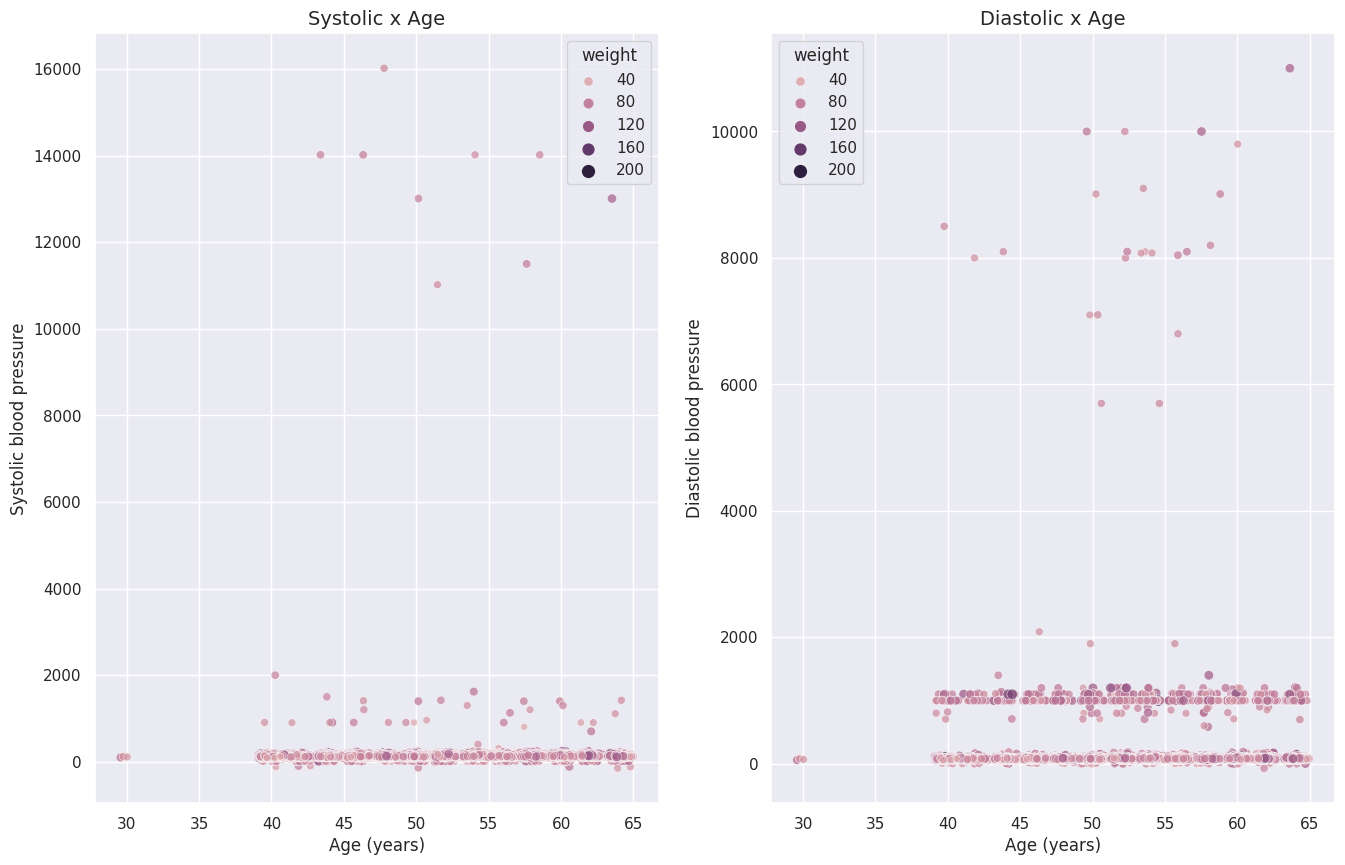

In [ ]:
# sets plot size
plt.figure(figsize=(16,10))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age_years', y='ap_hi', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Systolic blood pressure")
plt.title("Systolic x Age", fontsize=14)

plt.subplot(1,2,2)
sns.scatterplot(x='age_years', y='ap_lo', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Diastolic blood pressure")
plt.title("Diastolic x Age", fontsize=14)

# displays the plot
plt.show()

As observed, there are outliers due to:

All points above 2000 for both Systolic and Diastolic

Scatterplot graph that shows the relationship between two variables - diastolic (pressure in the blood vessels when the heart rests between beats) and systolic (pressure in the blood vessels when the heart beats)

- Based on the data provided in the "df_ccd_raw" dataset. The graph uses different colors and sizes to show the weight of the individuals in the dataset. The larger and darker points represent individuals with higher weight. The size of the graph is set to be 8 inches wide and 6 inches tall.

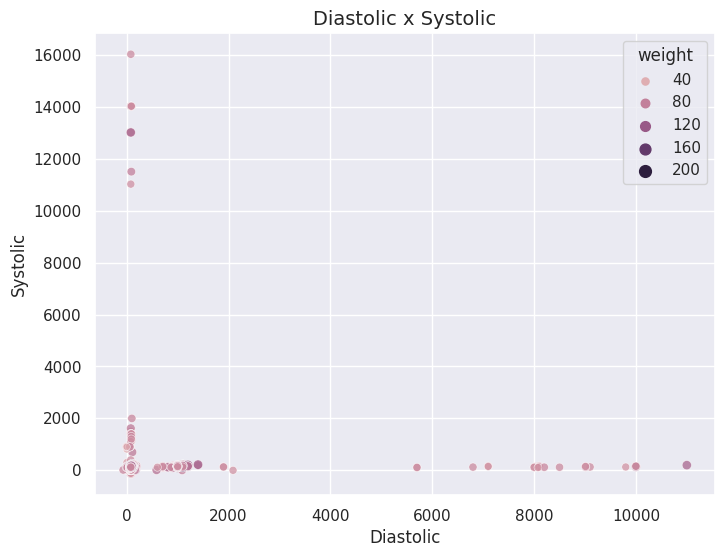

In [ ]:
# sets plot size
plt.figure(figsize=(8,6))

# plots scatterplot
sns.scatterplot(x='ap_lo', y='ap_hi', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Diastolic")
plt.ylabel("Systolic")
plt.title("Diastolic x Systolic", fontsize=14)

# displays the plot
plt.show()

### **Removing outliers**

Removing outliers is necessary to improve the accuracy and reliability of statistical analyses and the models.

- Outliers are data points that are significantly different from the majority of the data and can distort the results of statistical analyses or make models less accurate.

- By removing outliers, we can get a better understanding of the underlying patterns and relationships in the data, and create more accurate models that generalize better to new data.

The interquartile range (IQR) is a measure of the spread of a dataset. It is defined as the difference between the first quartile (Q1) and the third quartile (Q3).

Quartiles are values that divide a dataset into four equal parts.

- The first quartile (Q1) is the value below which 25% of the data falls, and

- The third quartile (Q3) is the value below which 75% of the data falls. The difference between Q3 and Q1 is the interquartile range (IQR).

In simpler terms, the IQR is the range between the middle 50% of a dataset, which gives a measure of how spread out the data is. Q1 represents the lower end of that middle range, while Q3 represents the upper end.

The IQR is a useful measure of variability because it is not affected by outliers like the range is.

Performing outlier detection for two variables 'ap_hi' and 'ap_lo' in the DataFrame 'df_ccd_raw'.

Calculating the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) of the 'ap_hi' variable using the numpy quantile function. Then it calculates the boundaries for outliers for this variable using the IQR and the formula Q1-1.5IQR for the lower bound and Q3+1.5IQR for the upper bound. Finally, it prints the values of Q1, Q3, IQR, lower bound, and upper bound for the 'ap_hi' variable.

Similarly, the calculating the Q1, Q3, IQR, lower bound, and upper bound for the 'ap_lo' variable and prints the values.

This information can be used to identify and remove the outliers in the 'ap_hi' and 'ap_lo' variables, if necessary, to avoid affecting the accuracy of statistical analysis and modeling.

In [ ]:
# calculates Q1, Q3 and IQR
Q1 = np.quantile(df_ccd_raw['ap_hi'], .25)
Q3 = np.quantile(df_ccd_raw['ap_hi'], .75)
IQR = Q3 - Q1

# calculates the outliers boundaries through statistical relationship
low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR

print("Systolic boundaries for outliers:")
print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlow_outliers = {low_outliers}\nhigh_outliers = {high_outliers}")


# calculates Q1, Q3 and IQR
Q1 = np.quantile(df_ccd_raw['ap_lo'], .25)
Q3 = np.quantile(df_ccd_raw['ap_lo'], .75)
IQR = Q3 - Q1

# calculates the outliers boundaries through statistical relationship
low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR

print("\nDiastolic boundaries for outliers")
print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlow_outliers = {low_outliers}\nhigh_outliers = {high_outliers}")


Systolic boundaries for outliers:
Q1 = 120.0
Q3 = 140.0
IQR = 20.0
low_outliers = 90.0
high_outliers = 170.0

Diastolic boundaries for outliers
Q1 = 80.0
Q3 = 90.0
IQR = 10.0
low_outliers = 65.0
high_outliers = 105.0


For Systolic (ap_hi):

Low outliers are values below 90.0
High outliers are value above 170

For Diastolic (ap_lo):

Low outliers are values below 65.0
High outliers are value above 105

Performing outlier removal from a dataset containing information about individuals, such as their age, weight, height, and blood pressure.

First, individuals whose systolic blood pressure is greater than or equal to 210 or diastolic blood pressure is greater than or equal to 150, or systolic blood pressure is less than or equal to 90, or diastolic blood pressure is less than or equal to 65.

Then, individuals whose height is less than or equal to 110 or greater than or equal to 210.

Next,individuals whose weight is less than or equal to 40.

Finally individuals whose age is less than 35.

After performing all the outlier removal operations, the resulting dataframe is stored in a variable named df_ccd_no.

In [ ]:
# removes outliers: blood pressure
df_ccd_no = df_ccd_raw[~((df_ccd_raw['ap_hi'] >= 210) | (df_ccd_raw['ap_lo'] >= 150)
           | (df_ccd_raw['ap_hi'] <= 90) | (df_ccd_raw['ap_lo'] <= 65))]

# removes outliers: height
df_ccd_no = df_ccd_no[~((df_ccd_no['height'] <= 110) | (df_ccd_no['height'] >= 210))]

# removes outliers: weight
df_ccd_no = df_ccd_no[~(df_ccd_no['weight'] <= 40)]

# checks for people that are too slim
df_ccd_no = df_ccd_no[~(df_ccd_no['age_years'] < 35)]

df_ccd_no

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,48.282192
5,8,21914,1,151,67.000000,120,80,2,2,0,0,0,0,60.038356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.000000,120,80,1,1,1,0,1,0,52.712329
69996,99995,22601,1,158,126.000000,140,90,2,2,0,0,1,1,61.920548
69997,99996,19066,2,183,105.000000,180,90,3,1,0,1,0,1,52.235616
69998,99998,22431,1,163,72.000000,135,80,1,2,0,0,0,1,61.454795


### **Checking for any missing data**

If there is any missing data in a dataset, it can cause biased or incomplete results when using statistical techniques, because missing values can lead to an incomplete sample, reducing the sample size, or they can cause biased results if the missing data is not missing at random.

Missing data can cause errors in the training process and can also cause the model to perform poorly or produce inaccurate predictions. Therefore, it is important to identify and handle missing data appropriately in order to ensure accurate and reliable results.

As observed below , there is no missing data.



In [ ]:
# checks for missing data
df_ccd_no.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

In [ ]:
# copies the data set
df_ccd_clean = df_ccd_no.copy()

In [ ]:
# saves the data set state
df_ccd_clean.to_csv('/content/drive/MyDrive/ccd_clean.csv', index=False)


In [ ]:
# checks data set dimension
df_ccd_clean.shape

(65409, 14)

### **Creating hypotheses**


A hypothesis is a statement or assumption about the data that can be tested and validated using statistical analysis.

For example, suppose a dataset that contains information about sales of a particular product. A hypothesis could be that the sales of the product increase during certain months of the year, such as around holidays or special events. Another hypothesis could be that customers who purchase the product are more likely to purchase other related products or services.

Hypotheses can also be used to compare different groups within the dataset. For example, you may hypothesize that there is a difference in sales between customers who live in urban areas versus rural areas.

Hypotheses are important because they provide a framework for conducting statistical analysis and interpreting the results. By formulating clear and testable hypotheses, researchers can determine whether the data supports their predictions and draw conclusions about the relationships between different variables.

**Person Age**

There are less cases of heart diseases among young people (up to 30s).

**Person Height**

The cases of heart diseases does not significantly depend on the height.

**Person Weight**

The higher the weight, the higher is the cases of heart diseases.

**Person Gender**

The cases of heart diseases does not significantly depend on the gender.

**Cholesterol**

There are more cases of heart diseases for people presenting well above normal levels of cholesterol.

**Glucose**

There are more cases of heart diseases for people presenting well above normal levels of glucose.

**Smoking**

The are more cases of heart diseases for people who smokes than for people who does not.

**Alcohol intake**

The are more cases of heart diseases for people who intakes alcohol than for people who does not.

**Physical activity**

The are more cases of heart diseases for people who does not do any physical activity than for people who does.

**Systolic**

How are the cases of heart diseases distributed among systolic blood pressures?

**Diastolic**

How are the cases of heart diseases distributed among diastolic blood pressures?


### **Feature Engineering**



Feature engineering is the process of selecting, transforming, and creating variables or features from raw data to improve the performance of machine learning models.

**Data Cleaning**: Before doing any feature engineering, start by cleaning the data. This includes handling missing values, removing duplicates, and dealing with outliers.

**Feature Selection**: After cleaning the data, decide which features to use in your model. This involves selecting the most important variables and dropping the irrelevant ones. You can use techniques such as correlation analysis, feature importance analysis, and dimensionality reduction to help with this process.

**Feature Transformation**: Once you've selected your features, you may need to transform them to make them more useful for modeling. This can include scaling, normalization, and encoding categorical variables. You may also need to create new features by combining or extracting information from existing ones.

**Feature Creation**: In some cases, you may need to create entirely new features based on your domain knowledge. For example, if you're working with time-series data, you may want to create lagged variables to capture temporal patterns.

**Feature Evaluation**: After creating and transforming your features, you need to evaluate their effectiveness. This involves testing your model with different feature combinations and evaluating their impact on model performance.

**Iteration**: Feature engineering is an iterative process. You may need to repeat the steps above multiple times to find the best set of features for your model. It's important to keep track of the changes you make and the impact they have on model performance.


Feature engineering is the process of creating new features or transforming existing features in a dataset to make them more informative and relevant for a particular problem or analysis.

It involves selecting, extracting, and transforming data features to improve the performance of a machine learning algorithm.

For example, if we are trying to predict house prices, you might create new features like the ratio of the number of bathrooms to the number of bedrooms, or the distance to the nearest school.

Feature engineering can help to increase the accuracy and interpretability of models and enable better insights from data.

In [ ]:
# loads the data set
df_ccd = pd.read_csv('/content/drive/MyDrive/ccd_clean.csv', low_memory=False)

# checks data set dimension
df_ccd.shape

(65409, 14)

Calculate the Body Mass Index (BMI) for each person in the dataset.

calculate the height of each person in squared meters by multiplying the height (in centimeters) with itself and then dividing the result by 10000. This is because BMI requires height to be in meters.

Then calculate BMI by dividing a person's weight (in kilograms) by their height (in meters) squared. This results in a new column added to the dataframe named 'bmi'.

In [ ]:
# calculates the height in squared meters
height_squared_meters = (np.multiply(df_ccd['height'], df_ccd['height']))/10000

# calculates BMI
df_ccd['bmi'] = np.divide(df_ccd['weight'], height_squared_meters)

calculates the percentage of the dataset df_ccd where the Body Mass Index (BMI) is greater than 40.

(df_ccd[df_ccd['bmi'] > 40].shape[0] / df_ccd.shape[0]) counts the number of rows where the BMI is greater than 40 and divides it by the total number of rows in the dataset df_ccd. This gives the proportion of rows where the BMI is greater than 40.

So the final output is the percentage of rows in df_ccd where the BMI is greater than 40.

In [ ]:
(df_ccd[df_ccd['bmi'] > 40].shape[0] / df_ccd.shape[0]) * 100


2.63572291274901

In [ ]:
# sets average normal BMI
normal_bmi = 21.7

In [ ]:
# calculates the difference
df_ccd['bmi_diff'] = df_ccd['bmi'] - normal_bmi

Adds a new column called 'weight_status' to the existing data frame 'df_ccd'. This column will contain the weight status of the individuals based on their BMI (Body Mass Index) values. The BMI values are already calculated and stored in another column 'bmi'.

A lambda function is used to apply a set of conditions to each BMI value in the 'bmi' column, and categorizes the individuals into different weight status categories. The conditions are as follows:

Individuals with BMI less than 18.5 are categorized as 'underweight'.

Individuals with BMI between 18.5 and 24.9 are categorized as 'normal'.

Individuals with BMI between 25 and 29.9 are categorized as 'overweight'.

Individuals with BMI greater than or equal to 30 are categorized as 'obese'.

The apply() function applies this lambda function to all the values in the 'bmi' column and creates a new column 'weight_status' with the respective weight status categories for each individual.

In [ ]:
# calculates the weight status
df_ccd['weight_status'] = df_ccd['bmi'].apply(lambda x: 'underweight' if x < 18.5
                                             else 'normal' if (x >= 18.5) & (x <= 29.4)
                                             else 'overweight' if (x >= 25) & (x <= 29.9)
                                             else 'obese')

### **Blood Pressure**


new column called "blood_pressure" in the DataFrame "df_ccd". The values in this column are determined based on the systolic blood pressure (ap_hi) and diastolic blood pressure (ap_lo) readings for each individual in the dataset.

classifying each person's blood pressure reading into one of several categories: "low", "normal", "elevated", "high stage one", "high stage two", or "hypertensive crisis".


In [ ]:
# calculates the blood pressures
df_ccd['blood_pressure'] = ['low' if (ap_hi <= 90) & (ap_lo <= 60)
                            else 'normal' if ((ap_hi > 90) & (ap_hi < 120)) & ((ap_lo > 60) & (ap_lo < 80))
                            else 'elevated' if ((ap_hi >= 120) & (ap_hi <= 120)) & (ap_lo < 80)
                            else 'high stage one' if ((ap_hi >= 130) & (ap_hi <= 139)) | ((ap_lo >= 80) & (ap_lo <=89))
                            else 'high stage two' if (ap_hi >= 140) | (ap_lo >= 90)
                            else 'hypertensive crisis'
                            for ap_hi, ap_lo in zip(df_ccd['ap_hi'], df_ccd['ap_lo'])]

In [ ]:
df_ccd.head(10)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bmi_diff,weight_status,blood_pressure
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,50.391781,21.967120,0.267120,normal,high stage one
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,55.419178,34.927679,13.227679,obese,high stage two
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,51.663014,23.507805,1.807805,normal,high stage one
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,48.282192,28.710479,7.010479,normal,high stage two
4,8,21914,1,151,67.000000,120,80,2,2,0,0,0,0,60.038356,29.384676,7.684676,normal,high stage one
5,9,22113,1,157,93.000000,130,80,3,1,0,0,1,0,60.583562,37.729725,16.029725,obese,high stage one
6,12,22584,2,178,95.000000,130,90,3,3,0,0,1,1,61.873973,29.983588,8.283588,obese,high stage one
7,13,17668,1,158,71.000000,110,70,1,1,0,0,1,0,48.405479,28.440955,6.740955,normal,normal
8,15,22530,1,169,80.000000,120,80,1,1,0,0,1,0,61.726027,28.010224,6.310224,normal,high stage one
9,16,18815,2,173,60.000000,120,80,1,1,0,0,1,0,51.547945,20.047446,-1.652554,normal,high stage one


In [ ]:
# saves data set state

df_ccd.to_csv('/content/drive/MyDrive/ccd_fe.csv', index=False)

### **Exploratory data analysis**

Exploratory data analysis (EDA) is a process of examining and understanding data to gain insights and identify patterns, relationships, and anomalies that may be hidden in the data. It is an approach that helps to summarize and visualize data to see what is happening and identify potential relationships between different variables.

EDA involves looking at data from different angles and perspectives to uncover interesting patterns or trends that might be useful in answering questions or solving problems.

For example, if you have a dataset with information about customers and their purchases, you might perform EDA to identify which products are most frequently purchased together, which customers tend to spend the most, and whether there are any outliers or unusual patterns in the data.

EDA can involve a variety of techniques, such as histograms, scatter plots, box plots, and summary statistics, which help to provide a comprehensive understanding of the data. The insights gained from EDA can be used to inform further analysis, such as predictive modeling or hypothesis testing.

In [ ]:
# loads the data set
df_ccd = pd.read_csv('/content/drive/MyDrive/ccd_fe.csv', low_memory=False)

# checks data set dimension
df_ccd.shape

(65409, 18)

### **Univariate analysis**


Univariate analysis involves analyzing a single variable in isolation. It helps in understanding the distribution, central tendency, and spread of data for a particular variable.

Univariate analysis is required to get insights into the following aspects of a variable:

- Descriptive statistics: Provides information about the mean, median, mode, range, and standard deviation of the variable.

- Data distribution: The shape and distribution of the data by using visualizations like histograms, density plots, and box plots.

- Outlier detection: Univariate analysis identifies outliers, which are data points that fall far from the majority of the data.

- Missing values: Detects missing values in a variable, which can be crucial for further analysis.

- Data cleaning: Provides insights into data quality and help identify errors or inconsistencies that need to be corrected.


visualizing the distribution of the target variable and see into whether the dataset is balanced or imbalanced.

### **Target variable**

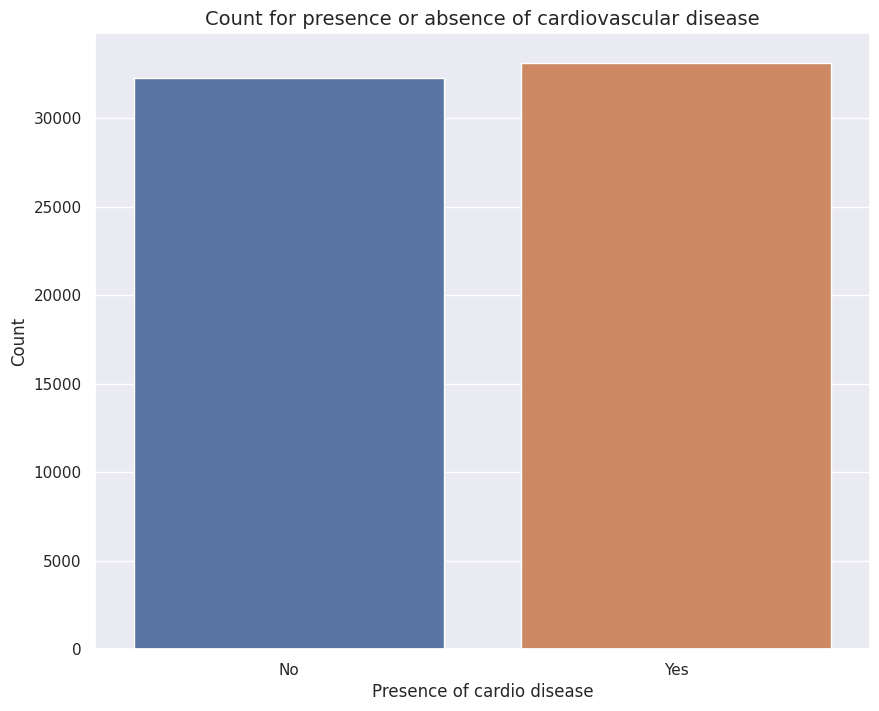

In [ ]:
# sets the plot size
plt.figure(figsize=(10,8))

# counts each class for the target var
_ = sns.countplot(x=df_ccd['cardio'])

# sets plot features
plt.title("Count for presence or absence of cardiovascular disease", fontsize=14)
plt.xlabel("Presence of cardio disease")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No','Yes'])

# displays the plot
plt.show()

As observed, the classes are balanced. We have almost equal number of cases for each class.

In [ ]:
total_presence = df_ccd.query("cardio == 1").shape[0]
total_absence = df_ccd.query("cardio == 0").shape[0]
total_cases = df_ccd.shape[0]

print(f'Number of presence of CVDs: {total_presence} ({round(total_presence/total_cases, 2)*100}% of the total cases)')
print(f'Number of absence of CVDs: {total_absence} ({round(total_absence/total_cases, 2)*100}% of the total cases)')

Number of presence of CVDs: 33137 (51.0% of the total cases)
Number of absence of CVDs: 32272 (49.0% of the total cases)


### **Numerical variables**

- age
- height
- weight
- ap_hi
- ap_lo
- bmi
- bmi_diff

Creating a histogram plot for each numerical variable in the dataset.

In [ ]:
# gets the numerical vars
numerical_vars = df_ccd[['age_years','height','weight','ap_hi','ap_lo', 'bmi', 'bmi_diff']]

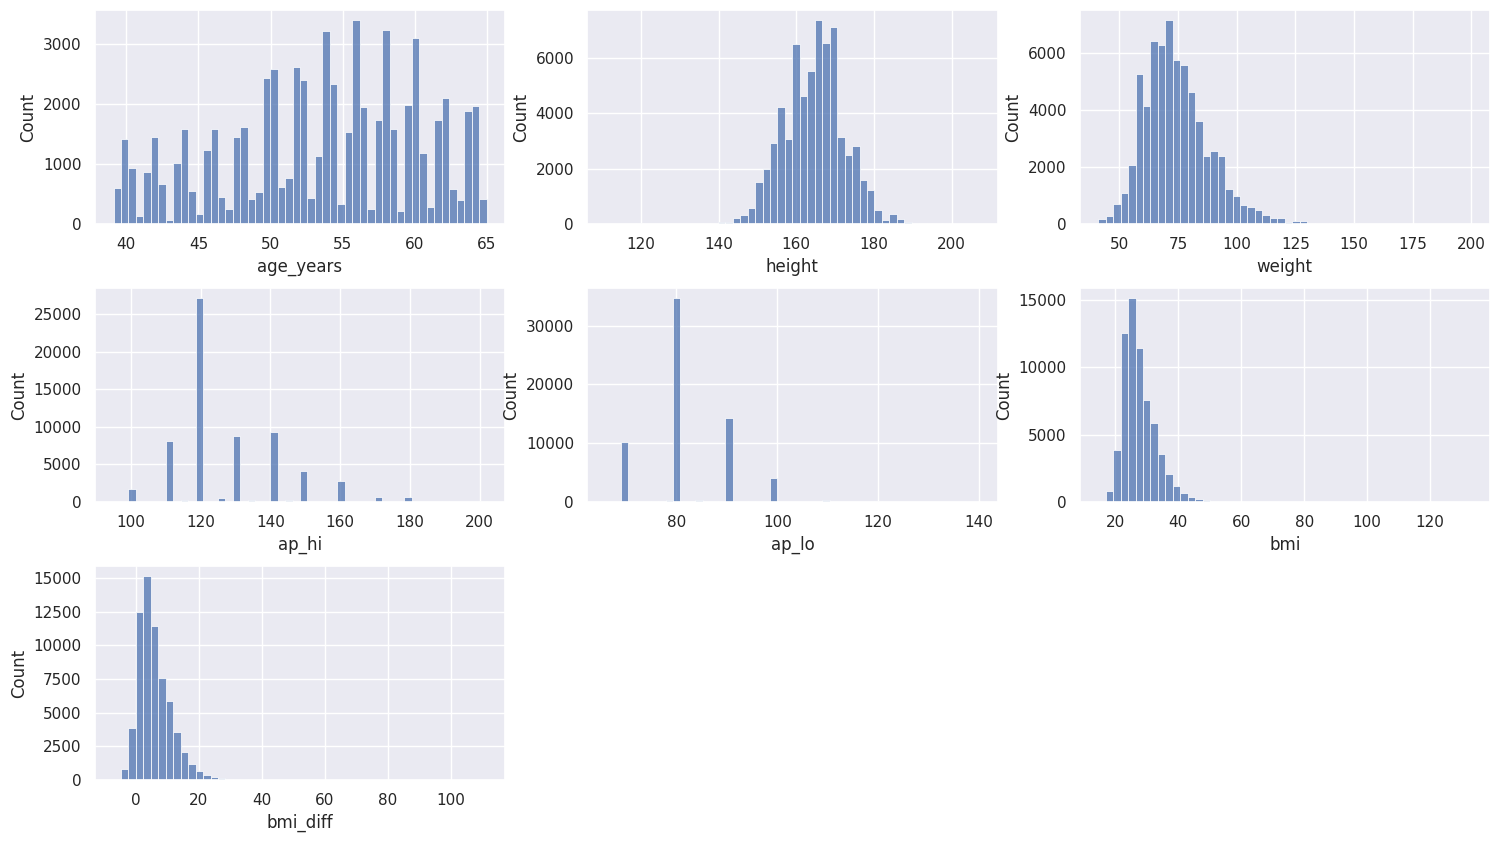

In [ ]:
# sets plot size
plt.figure(figsize=(18, 10))

# sets the inital plot position
n = 1

# iterates over the columns to plot
for column in numerical_vars.columns:
    plt.subplot(3, 3, n)
    _ = sns.histplot(x=numerical_vars[column], bins=50)
    n += 1

# adjusts vertical space between plots
plt.subplots_adjust(hspace=0.3)

# displays the plot
plt.show()

As observed, most examined patients:

Have ages between 50 and 60 years old.

Are 160 cm to 170 cm tall.

Weight between 60 kg to 80 kg.

Presents a blood pressure of 120 for diastolic and 80 for systolic which means elevated to high blood pressure.


#### **Categorical variables**

- gender
- cholesterol
- gluc
- smoke
- alco
- active
- weight_status
- blood_pressure

In [ ]:
# gets the categorical vars
categorical_vars = df_ccd[['gender','cholesterol','gluc','smoke','alco','active','weight_status', 'blood_pressure']]

In [ ]:
# sets string categories for gender
categorical_vars['gender'] = categorical_vars['gender'].apply(lambda x: 'A' if x == 1 else 'B')

# converts gender to categorical dtype
categorical_vars['gender'] = categorical_vars['gender'].astype('category')

# sets string categories for glucose
categorical_vars['gluc'] = categorical_vars['gluc'].apply(lambda x: 'normal' if x == 1
                                                                else 'above normal' if x == 2
                                                                else 'well above normal')
# converts glucose to categorical dtype
categorical_vars['gluc'] = categorical_vars['gluc'].astype('category')

# sets string categories for cholesterol
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].apply(lambda x: 'normal' if x == 1
                                                                        else 'above normal' if x == 2
                                                                        else 'well above normal')

# converts cholesterol to categorical dtype
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].astype('category')

# sets string categories for smoke
categorical_vars['smoke'] = categorical_vars['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')

# converts smoke to categorical dtype
categorical_vars['smoke'] = categorical_vars['smoke'].astype('category')

# sets string categories for alcohol intake
categorical_vars['alco'] = categorical_vars['alco'].apply(lambda x: 'yes' if x == 1 else 'no')

# converts alcohol intake to categorical dtype
categorical_vars['alco'] = categorical_vars['alco'].astype('category')

# sets string categories for active
categorical_vars['active'] = categorical_vars['active'].apply(lambda x: 'yes' if x == 1 else 'no')

# converts active to categorical dtype
categorical_vars['active'] = categorical_vars['active'].astype('category')

<ipython-input-43-08b67c93e59f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gender'] = categorical_vars['gender'].apply(lambda x: 'A' if x == 1 else 'B')
<ipython-input-43-08b67c93e59f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gender'] = categorical_vars['gender'].astype('category')
<ipython-input-43-08b67c93e59f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

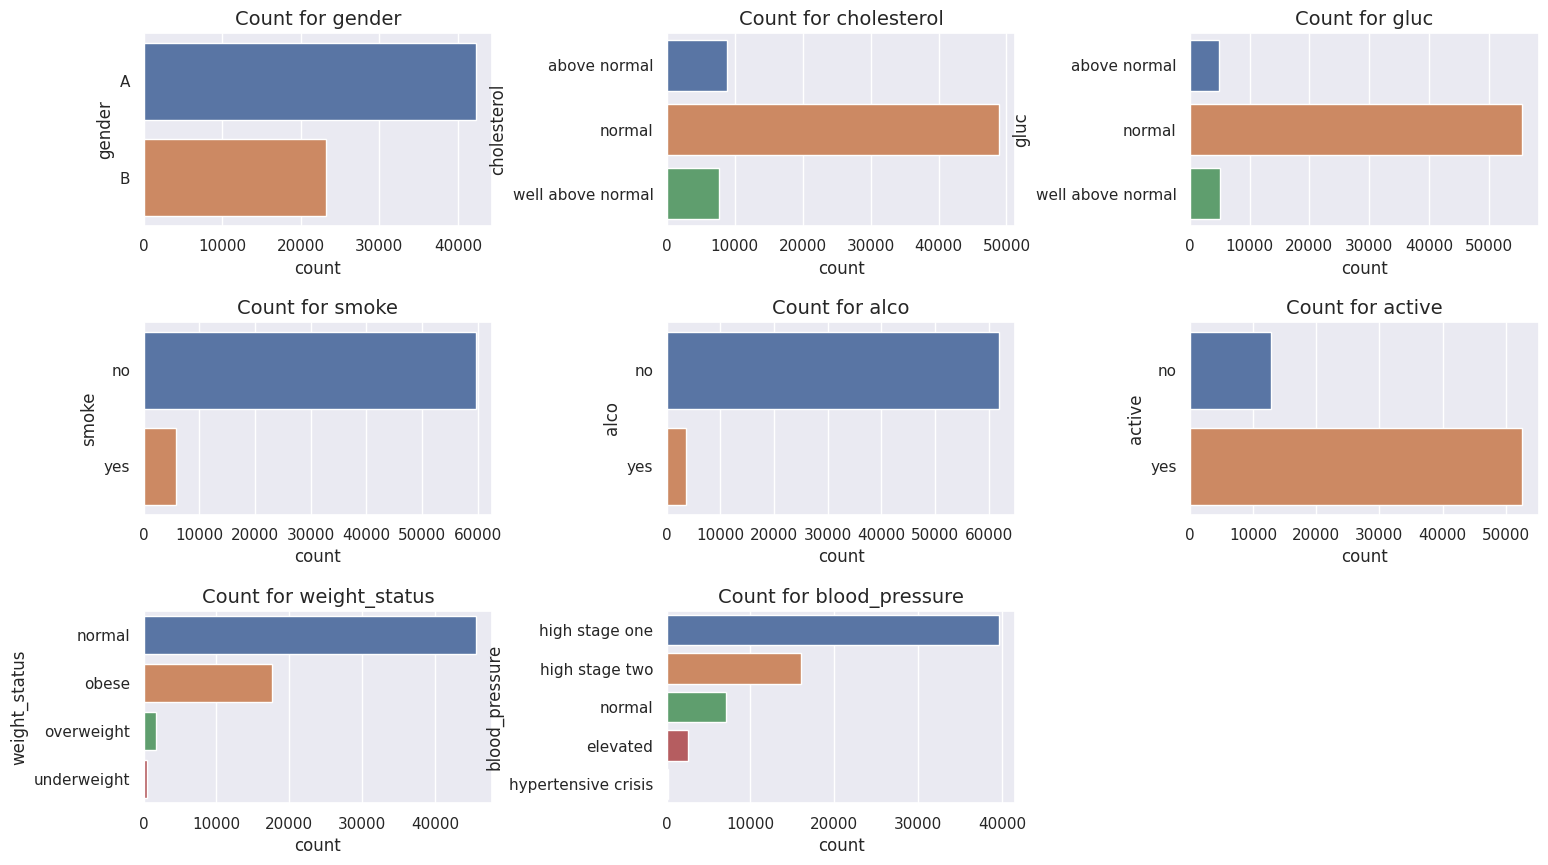

In [ ]:
# sets plot size
plt.figure(figsize=(18, 10))

# sets the inital plot position
n = 1

# iterates over the columns to plot
for column in categorical_vars.columns:
    plt.subplot(3, 3, n)
    _ = sns.countplot(y=categorical_vars[column])
    plt.title("Count for " + column, fontsize=14)
    n += 1

# adjust height and wdith reserved for space between subplots
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

# display the plot
plt.show()

- There many more people presenting normal levels for both cholesterol and glucose.

- The great majority of people don't smoke neither intakes alcohol.

- The majority of people are physically active.

### **Bivariate analysis - Hypotheses validation**


Bivariate analysis is a statistical method used to explore the relationship between two variables in a data set. In hypothesis validation, the goal is to test the relationship between two variables and determine whether the relationship is statistically significant.

The following are the steps involved in performing a bivariate analysis for hypothesis validation:

State the null and alternative hypotheses:

Before beginning the analysis, it is important to state the null and alternative hypotheses. The null hypothesis assumes that there is no significant relationship between the two variables, while the alternative hypothesis assumes that there is a significant relationship.

The null hypothesis states that there is no significant relationship between the two variables. This means that any relationship observed in the data could be due to chance or random variability.

The alternative hypothesis states that there is a significant relationship between the two variables. This means that the relationship observed in the data is not due to chance or random variability.

To test these hypotheses, we use statistical methods to determine if the observed relationship is statistically significant or if it could have occurred by chance. We set a level of significance (often 0.05 or 0.01), and if the p-value (the probability of observing the relationship by chance) is less than the level of significance, we reject the null hypothesis and conclude that there is a significant relationship between the two variables. If the p-value is greater than the level of significance, we fail to reject the null hypothesis and conclude that there is no significant relationship between the two variables.

Choose the appropriate statistical test:

The statistical test used in bivariate analysis depends on the types of variables being analyzed and the nature of the relationship being tested. For example, if the two variables are continuous and normally distributed, a Pearson correlation coefficient can be used. If the two variables are categorical, a chi-square test can be used.

Choosing the appropriate statistical test for bivariate analysis depends on several factors, including the type of variables being analyzed and the research question being asked. Here are some common statistical tests used in bivariate analysis:

1. **Pearson correlation coefficient:**

- Used to test the relationship between two continuous variables. It measures the strength and direction of the linear relationship between the two variables.

2. **Spearman rank correlation coefficient:**

- Used to test the relationship between two ordinal variables. It measures the strength and direction of the monotonic relationship between the two variables.

3. **Chi-square test:**

- Used to test the relationship between two categorical variables. It measures the independence between the two variables.

4. **t-test:**

- Used to test the relationship between a continuous variable and a categorical variable with two levels. It compares the means of the continuous variable between the two groups.

5. **ANOVA:**

- Used to test the relationship between a continuous variable and a categorical variable with more than two levels. It compares the means of the continuous variable across the different categories of the categorical variable.

It is important to choose the appropriate statistical test based on the type of variables being analyzed and the research question being asked. Choosing the wrong test can lead to incorrect conclusions and inaccurate results.

- Determine the level of significance:

The level of significance is the probability of observing a relationship between the two variables by chance. Typically, a significance level of 0.05 or 0.01 is used.

Determining the level of significance in bivariate analysis is an important step in hypothesis testing. The level of significance is the probability of rejecting the null hypothesis when it is actually true. In other words, it is the maximum probability of making a type I error (rejecting the null hypothesis when it is true).

The most commonly used levels of significance in bivariate analysis are 0.05 and 0.01. A level of significance of 0.05 means that there is a 5% chance of making a type I error, and a level of significance of 0.01 means that there is a 1% chance of making a type I error.

The level of significance should be chosen based on the importance of the decision being made and the consequences of making a type I error. If the consequences of making a type I error are severe, a lower level of significance (e.g., 0.01) may be appropriate. However, if the consequences of making a type I error are not severe, a higher level of significance (e.g., 0.05) may be acceptable.

It is important to note that a smaller level of significance requires more evidence to reject the null hypothesis, which can make it more difficult to detect a true relationship between variables. Conversely, a larger level of significance requires less evidence to reject the null hypothesis, which can increase the risk of making a type I error.

- Conduct the statistical test:

Once the appropriate statistical test is chosen, it can be conducted using software like R or Python. The output of the test will provide a p-value, which represents the probability of observing the relationship between the two variables by chance.

- Interpret the results:

If the p-value is less than the chosen significance level, the null hypothesis can be rejected, and the alternative hypothesis can be accepted. This means that there is a significant relationship between the two variables. If the p-value is greater than the significance level, the null hypothesis cannot be rejected, and it can be concluded that there is no significant relationship between the two variables.

The null hypothesis in bivariate analysis is a statement that there is no significant relationship or association between two variables, and it serves as a reference point for hypothesis testing.

The p-value significance level is a threshold used in hypothesis testing to determine whether the null hypothesis should be rejected or not. It is the probability of obtaining a test statistic as extreme as, or more extreme than, the observed result under the assumption that the null hypothesis is true.

The p-value is compared to a predetermined significance level, also known as alpha, to determine whether the null hypothesis should be rejected or not. The significance level is typically set at 0.05 or 0.01, indicating a 5% or 1% chance, respectively, of rejecting the null hypothesis when it is actually true.

If the p-value is less than or equal to the significance level, then there is strong evidence against the null hypothesis and it is rejected. This means that the results are statistically significant and support the alternative hypothesis. Conversely, if the p-value is greater than the significance level, then there is insufficient evidence to reject the null hypothesis, and it is not rejected.

In summary, the p-value significance level is a critical component of hypothesis testing as it helps researchers to determine the level of evidence needed to support or reject the null hypothesis.

Bivariate analysis is a useful statistical method for exploring the relationship between two variables and determining whether the relationship is significant. By following these steps, the hypotheses can be validated using appropriate statistical tests, and the results can be used to inform decision-making in data science.

In [ ]:
# rounds the ages for easier EDA
df_ccd['age_years'] = round(df_ccd['age_years'], ndigits=0).astype(int)

### H1. There are less cases of heart diseases among young people (up to 30s).

(TRUE)


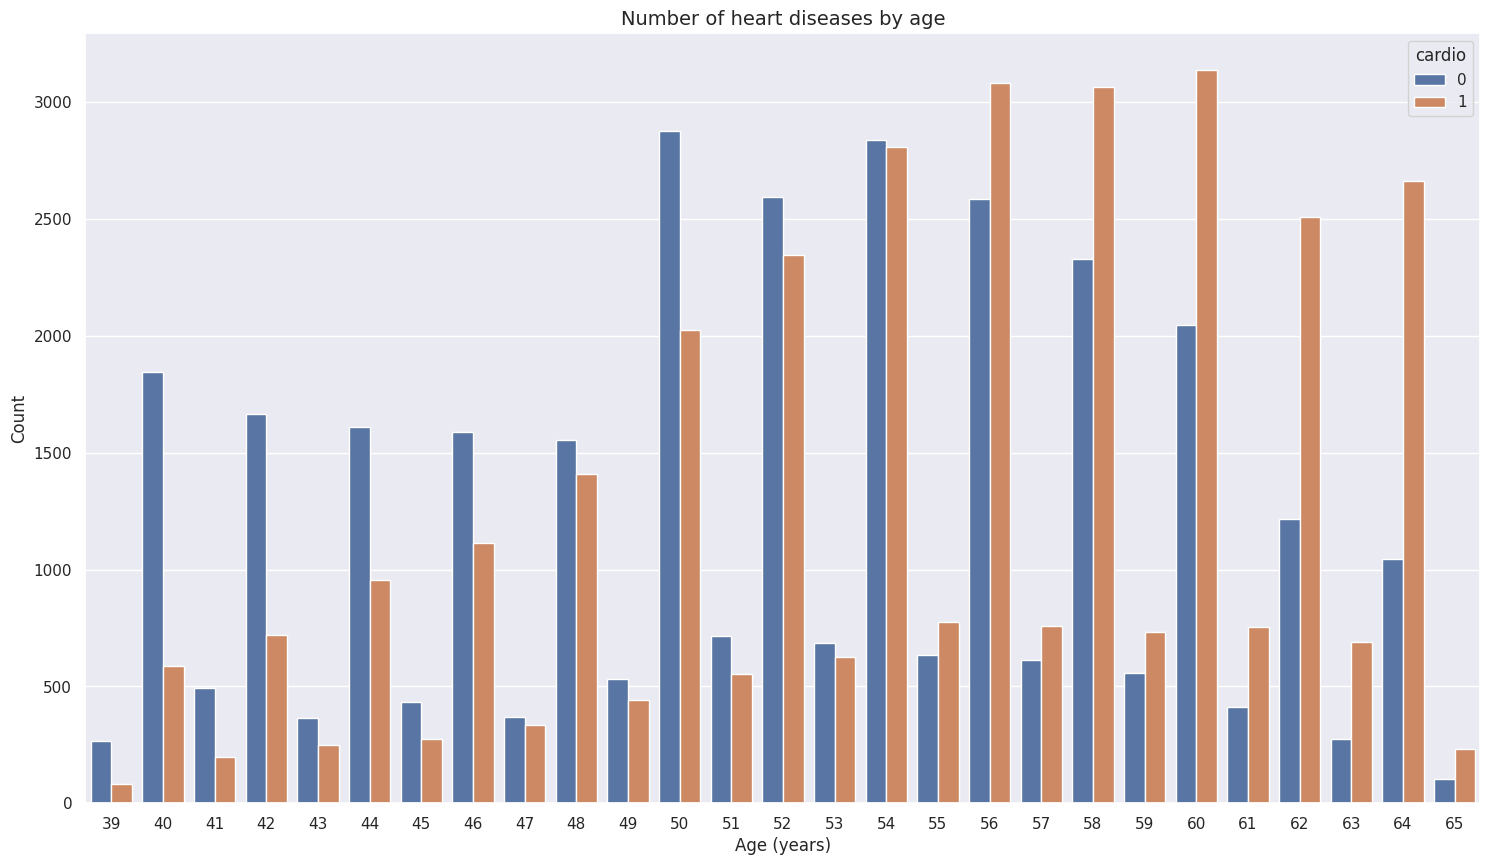

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='age_years', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by age", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Count")

# displays plot
plt.show()

As observed, there are no cases of heart diseases for people under 30s.


Thus, the hypothesis is TRUE.

### H2. The cases of heart diseases does not significantly depend on the height. (FALSE)


Text(0, 0.5, 'Count')

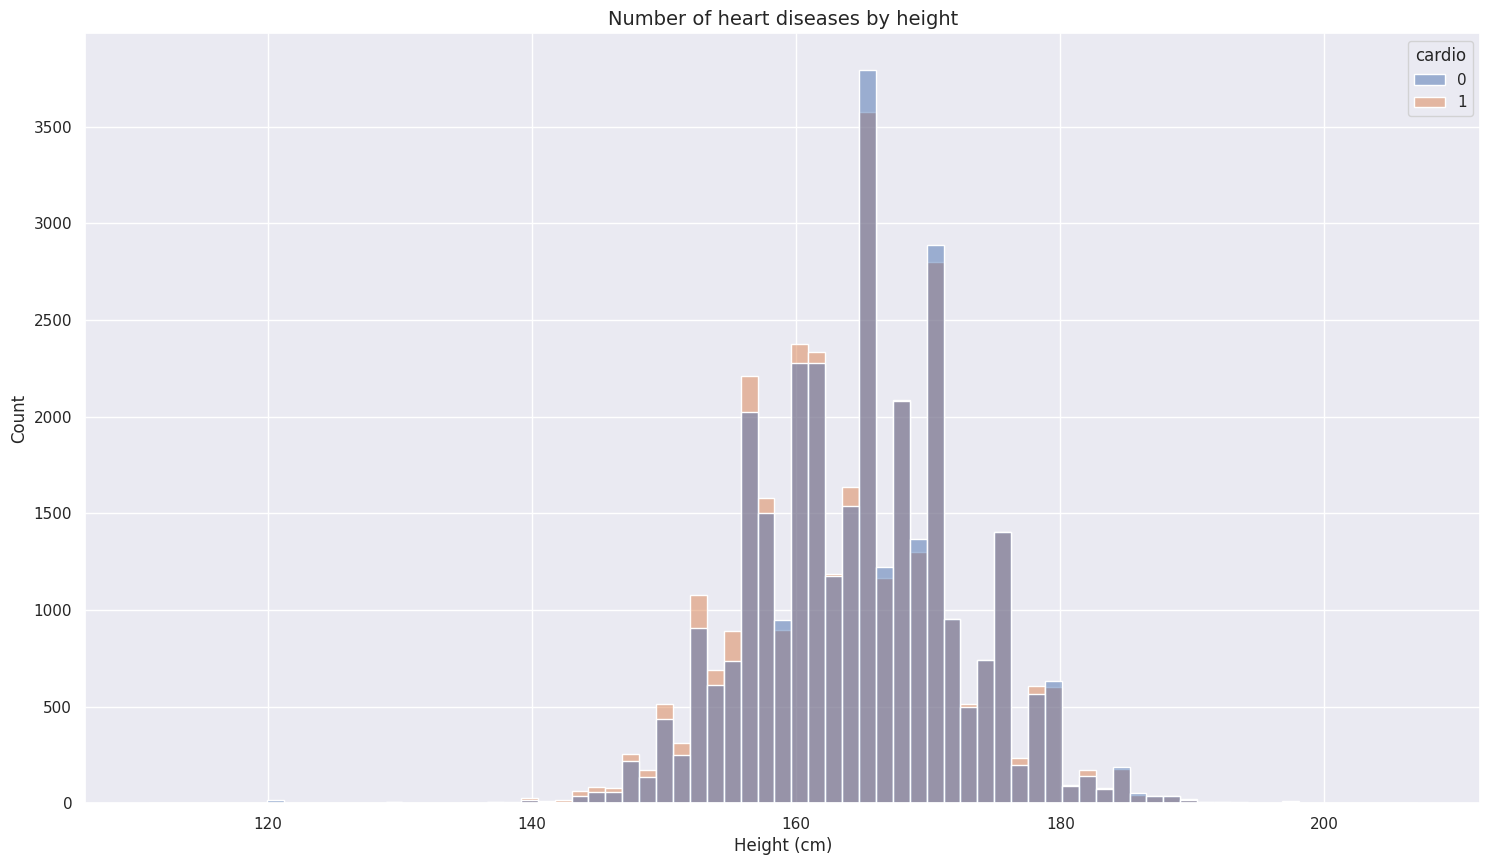

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='height', hue='cardio', data=df_ccd, bins=75)

# sets plot features
plt.title("Number of heart diseases by height", fontsize=14)
plt.xlabel("Height (cm)")
plt.ylabel("Count")

# display plot

As observed, up to ~165 cm there are significantly more cases of heart diseases. Then, above this height, there are fewer cases.

Thus, the hypothesis is FALSE.

### H3. The higher the weight, the higher is the cases of heart diseases. (TRUE)


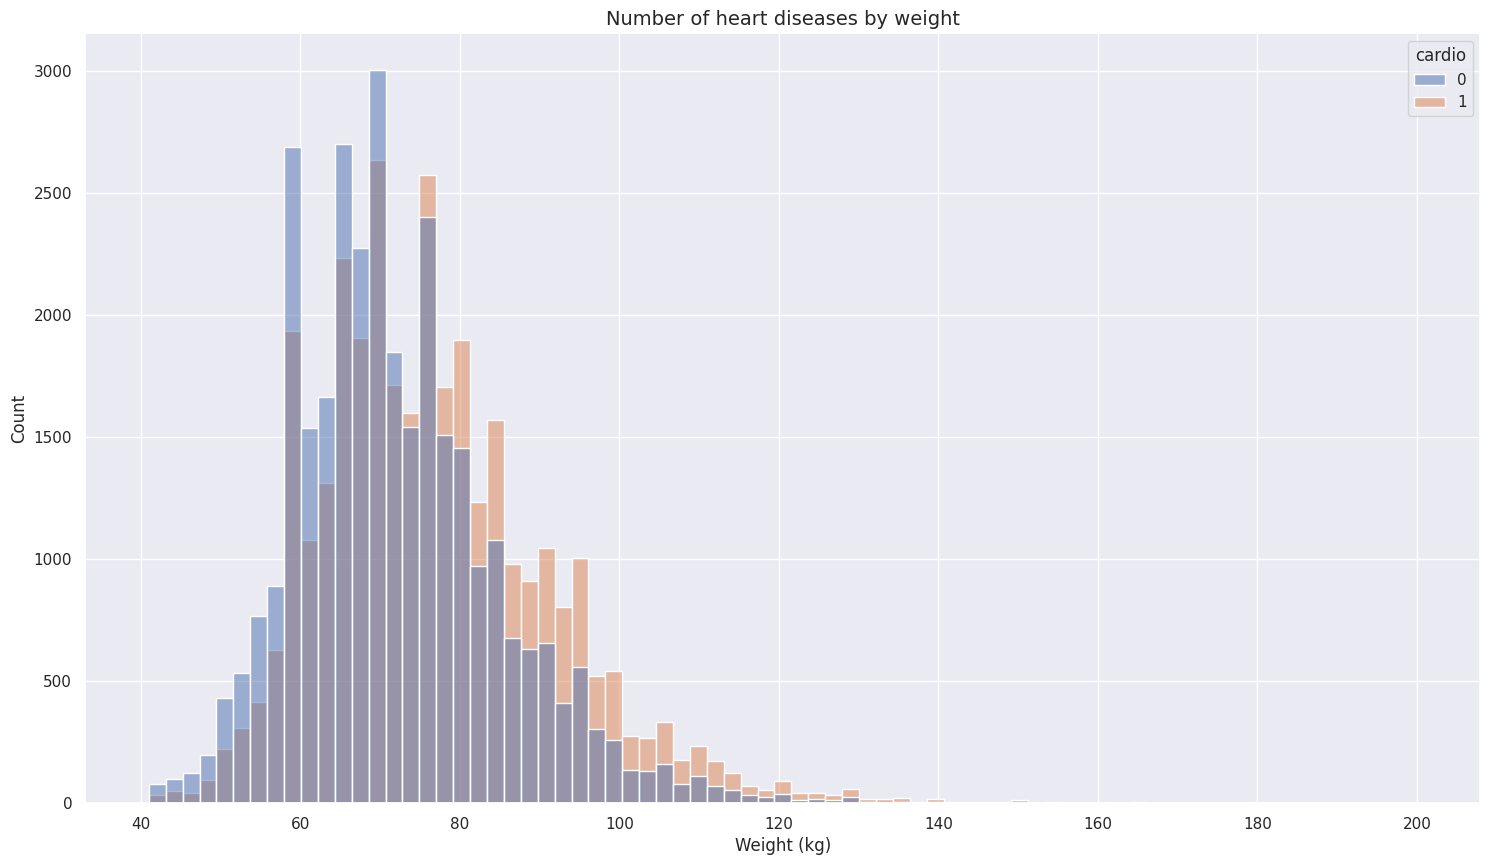

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='weight', hue='cardio', data=df_ccd, bins=75)

# sets plot features
plt.title("Number of heart diseases by weight", fontsize=14)
plt.xlabel("Weight (kg)")
plt.ylabel("Count")

# display plot
plt.show()


As observed, there a higher number of cases of heart disease for weights above ~75 kg.

Thus, the hypothesis is FALSE.

#### H4. The cases of heart diseases does not significantly depend on the gender. (FALSE)


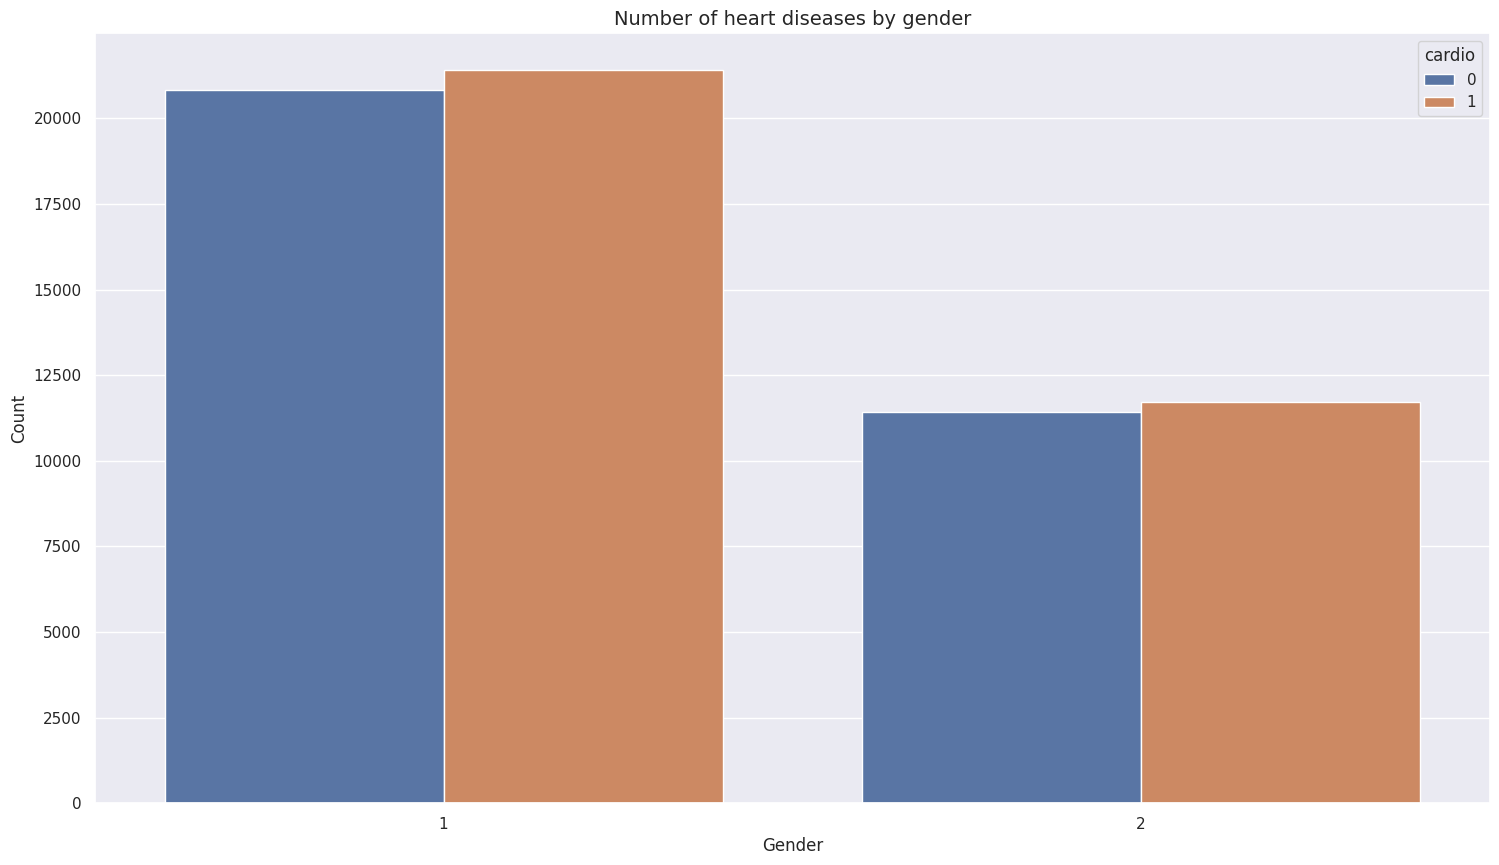

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='gender', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")

# display plot
plt.show()


As observed, there are different number of cases of heart disease for each gender. This could be due the proportion of the sample.

Thus, the hypothesis is FALSE

#### H5. There are more cases of heart diseases for people presenting well above normal levels of cholesterol. (TRUE)


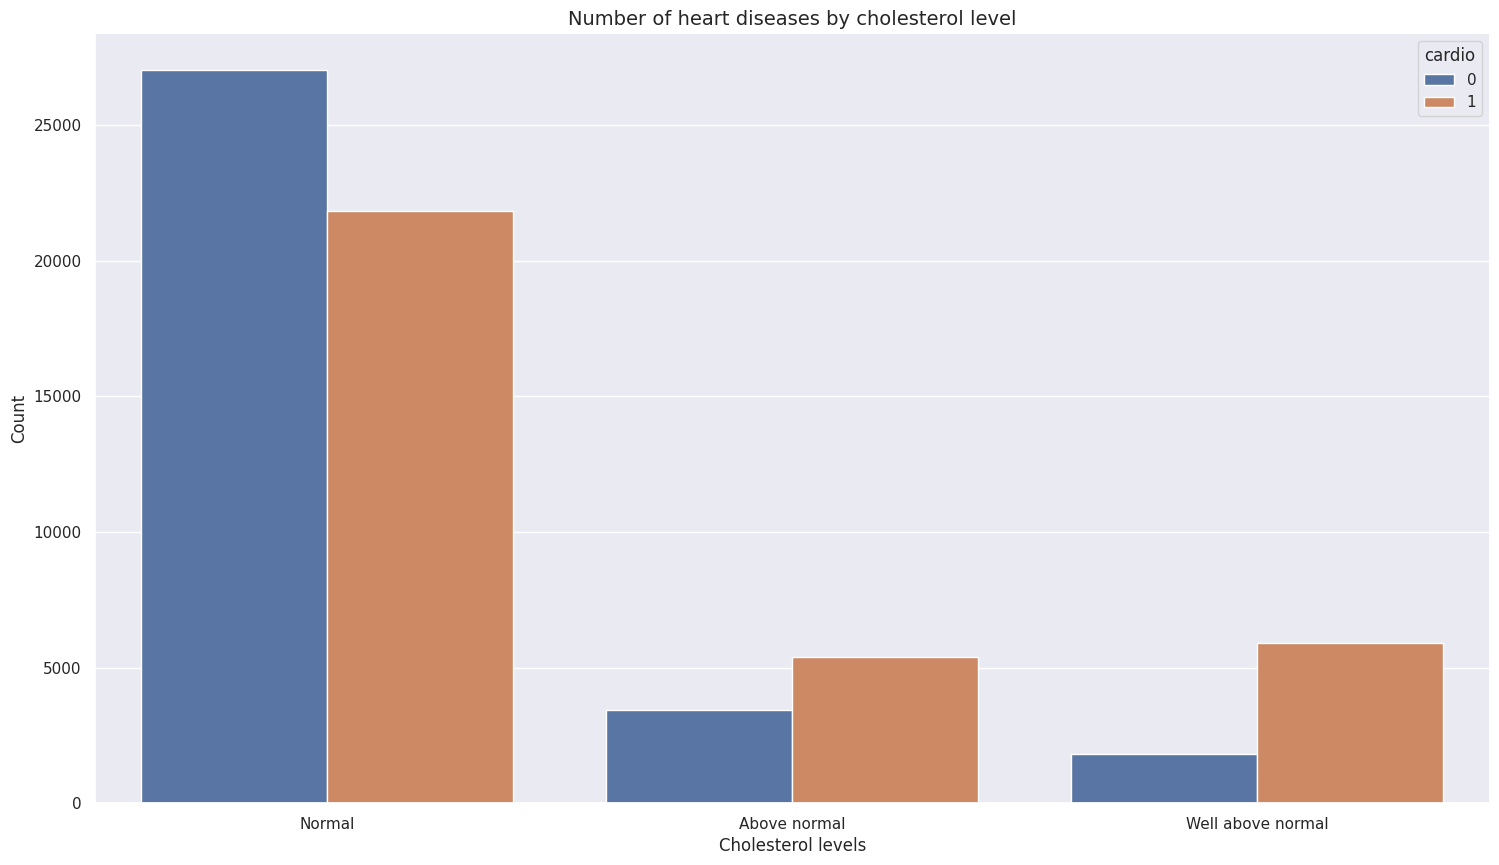

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='cholesterol', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by cholesterol level", fontsize=14)
plt.xlabel("Cholesterol levels")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=['Normal','Above normal','Well above normal'])

# display plot
plt.show()

As observed, proportionally, there are many more cases for people presenting higher levels of cholesterol.

Thus, the hypothesis is TRUE.

#### H6. There are more cases of heart diseases for people presenting well above normal levels of glucose. (TRUE)


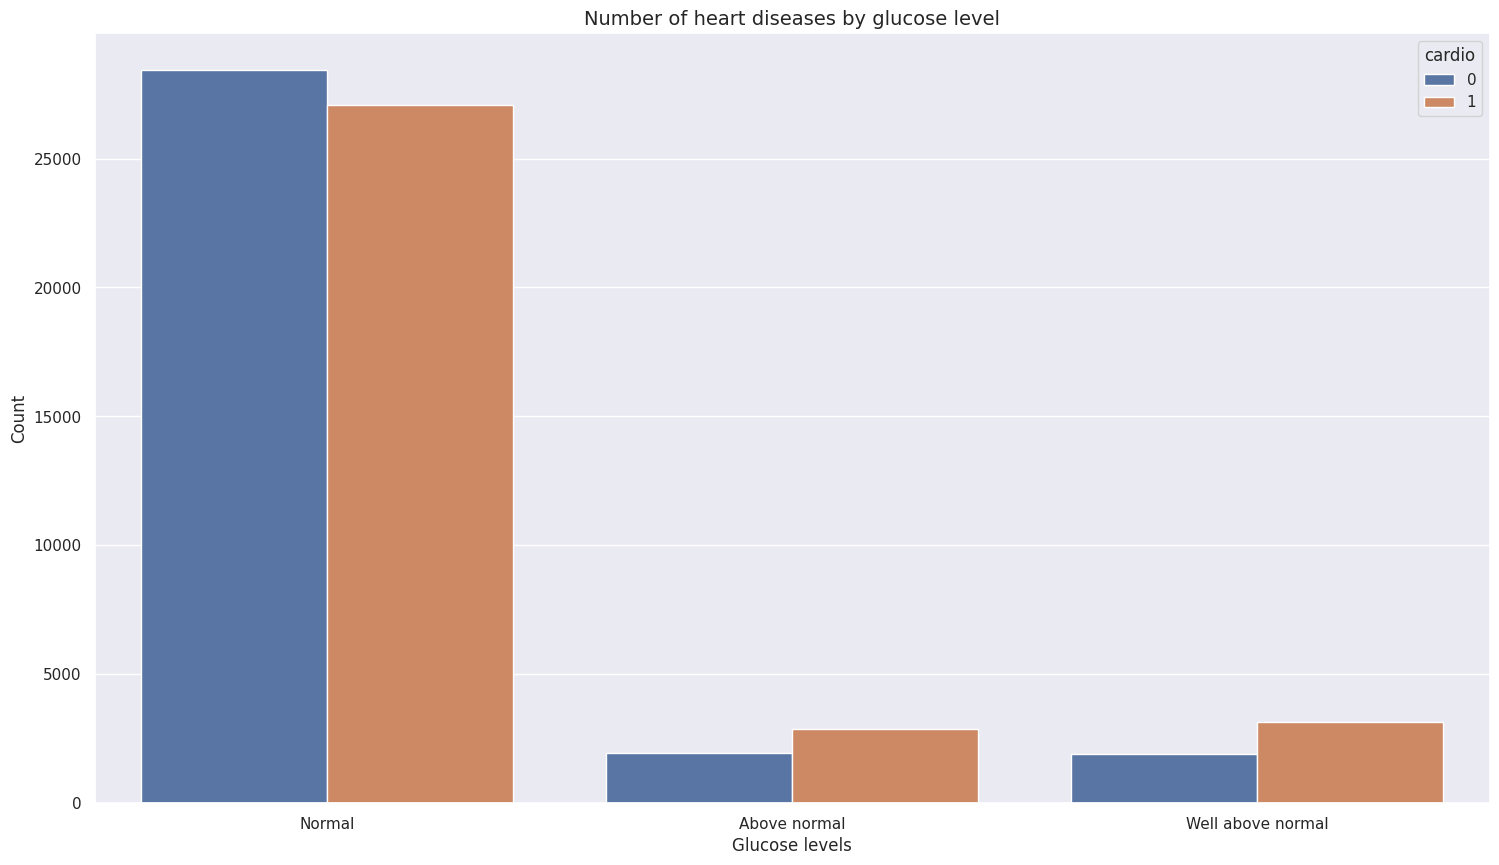

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='gluc', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by glucose level", fontsize=14)
plt.xlabel("Glucose levels")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=['Normal','Above normal','Well above normal'])

# display plot
plt.show()

As observed, proportionally, there are many more cases for people presenting higher levels of glucose.

Thus, the hypothesis is TRUE.

#### H7. The are more cases of heart diseases for people who smokes than for people who does not. (FALSE)


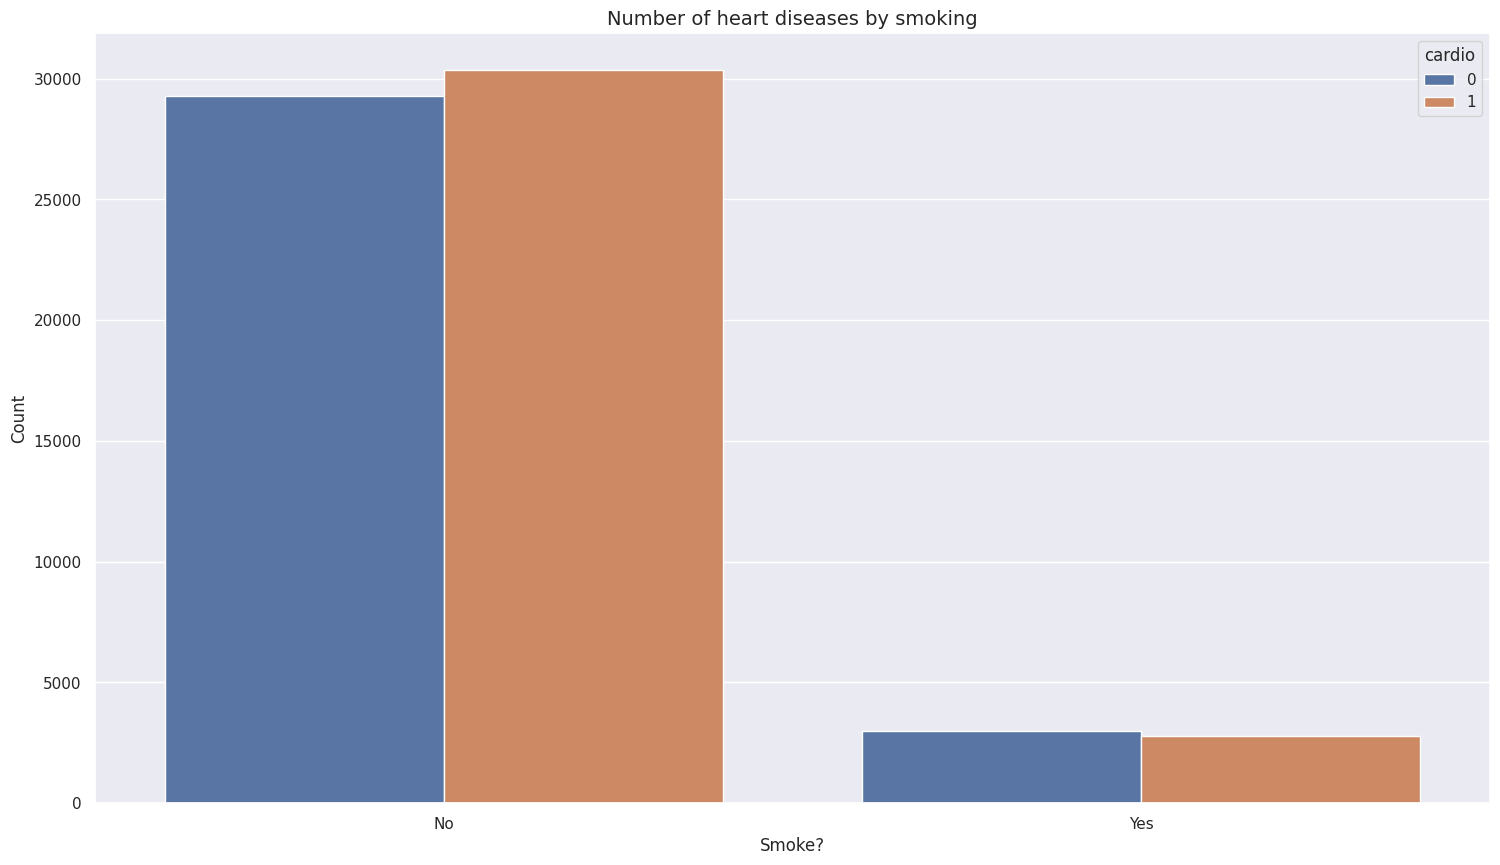

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='smoke', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by smoking", fontsize=14)
plt.xlabel("Smoke?")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])

# display plot
plt.show()

As observed, the great majority of cases are among people who doesn't smoke.

Thus, the hypothesis is FALSE.

#### H8. The are more cases of heart diseases for people who intakes alcohol than for people who does not. (FALSE)


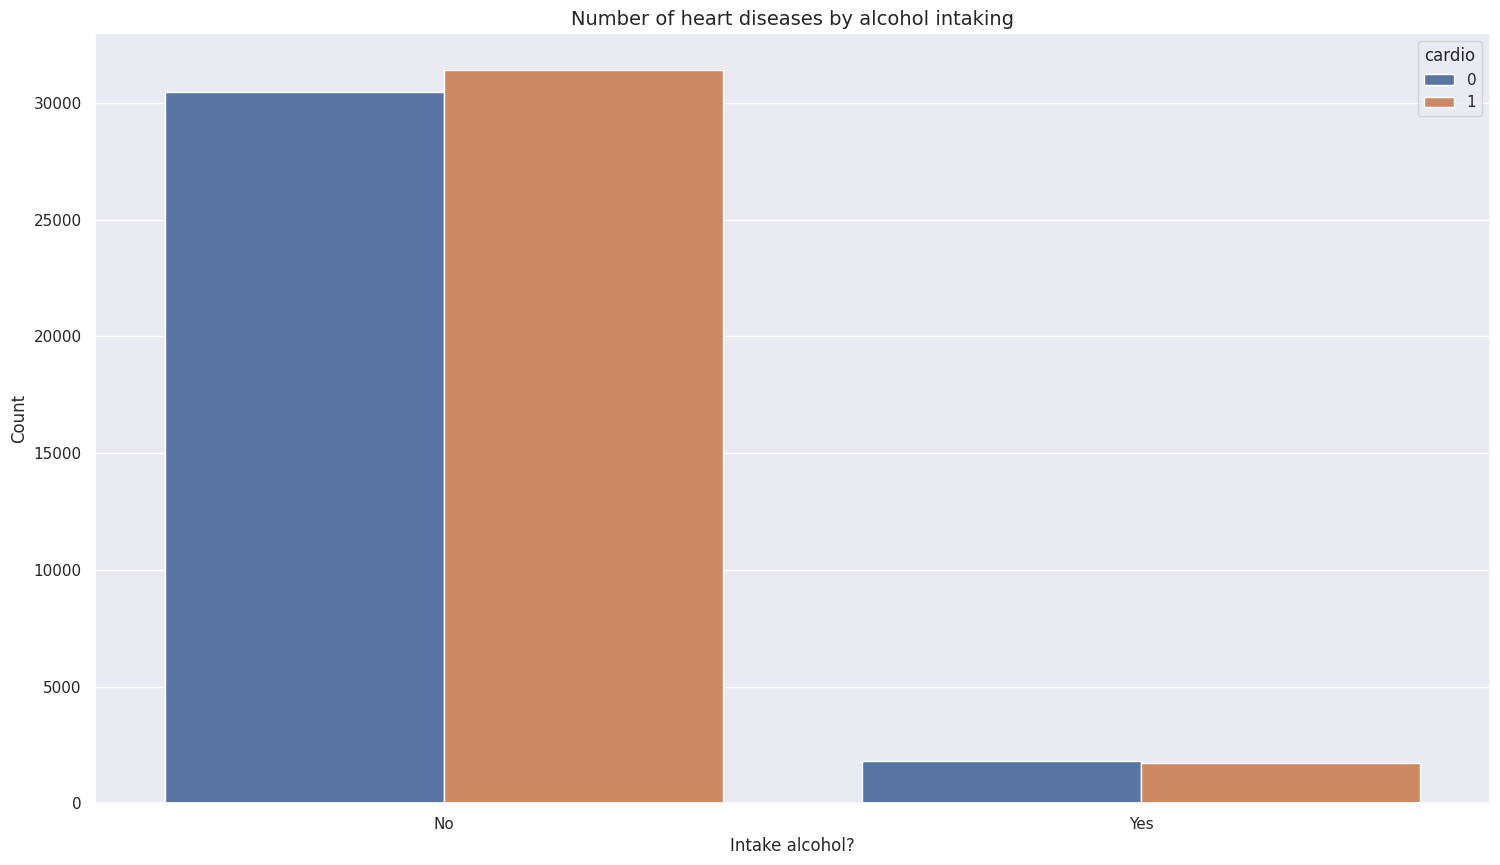

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='alco', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by alcohol intaking", fontsize=14)
plt.xlabel("Intake alcohol?")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])

# display plot
plt.show()

As observed, the great majority of cases are among people who doesn't intake alcohol.

Thus, the hypothesis is FALSE.

#### H9. The are more cases of heart diseases for people who does not do any physical activity than for people who does. (TRUE)

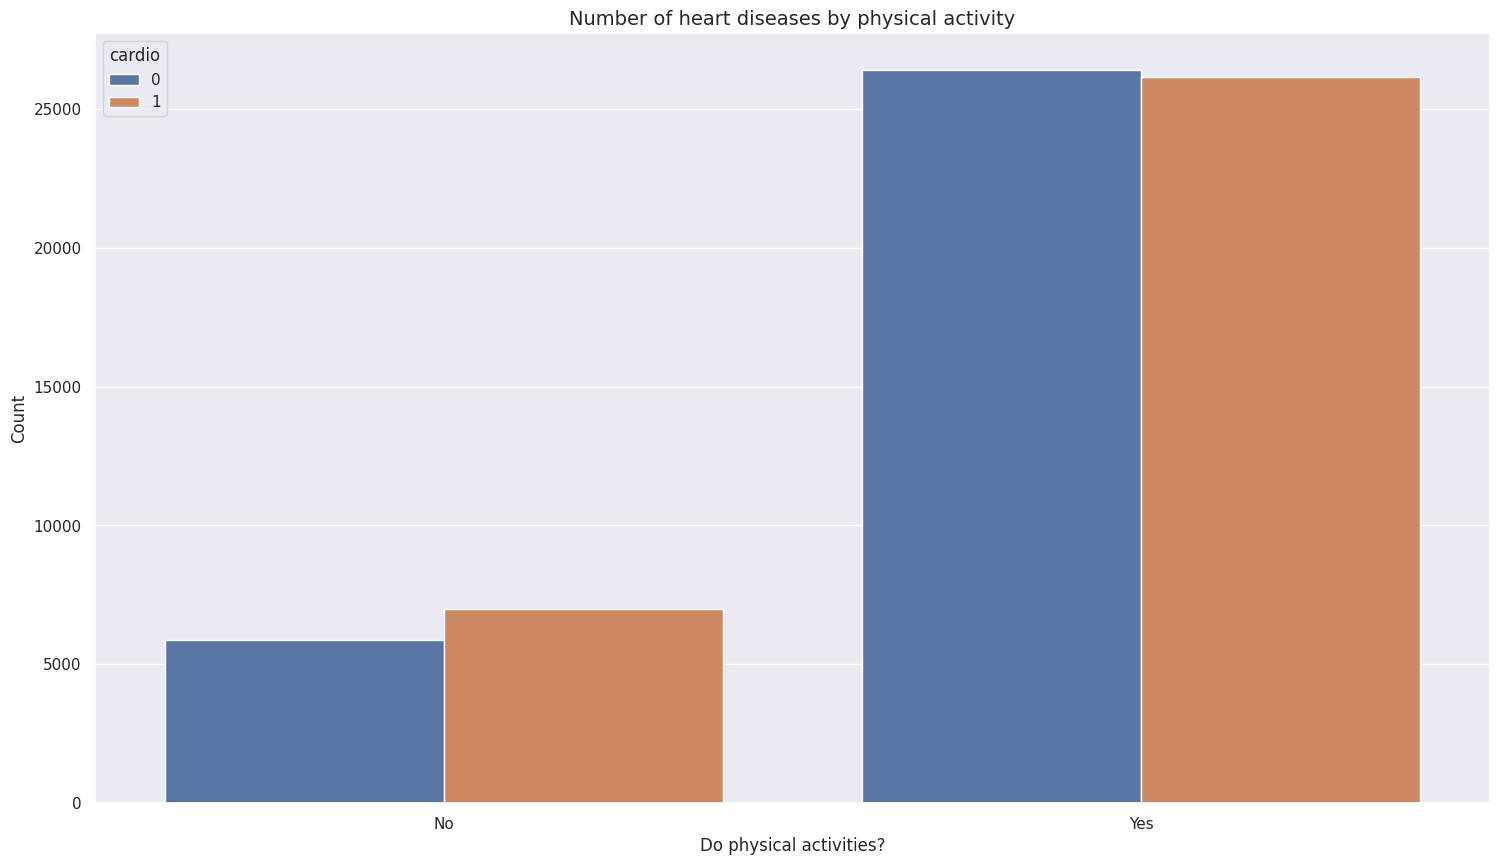

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='active', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by physical activity", fontsize=14)
plt.xlabel("Do physical activities?")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])

# display plot
plt.show()

As observed, people who don't do any physical activity presents more cases of heart diseases.

Thus, ths hypothesis is TRUE.

#### H10. How are the cases of heart diseases distributed among systolic blood pressures?


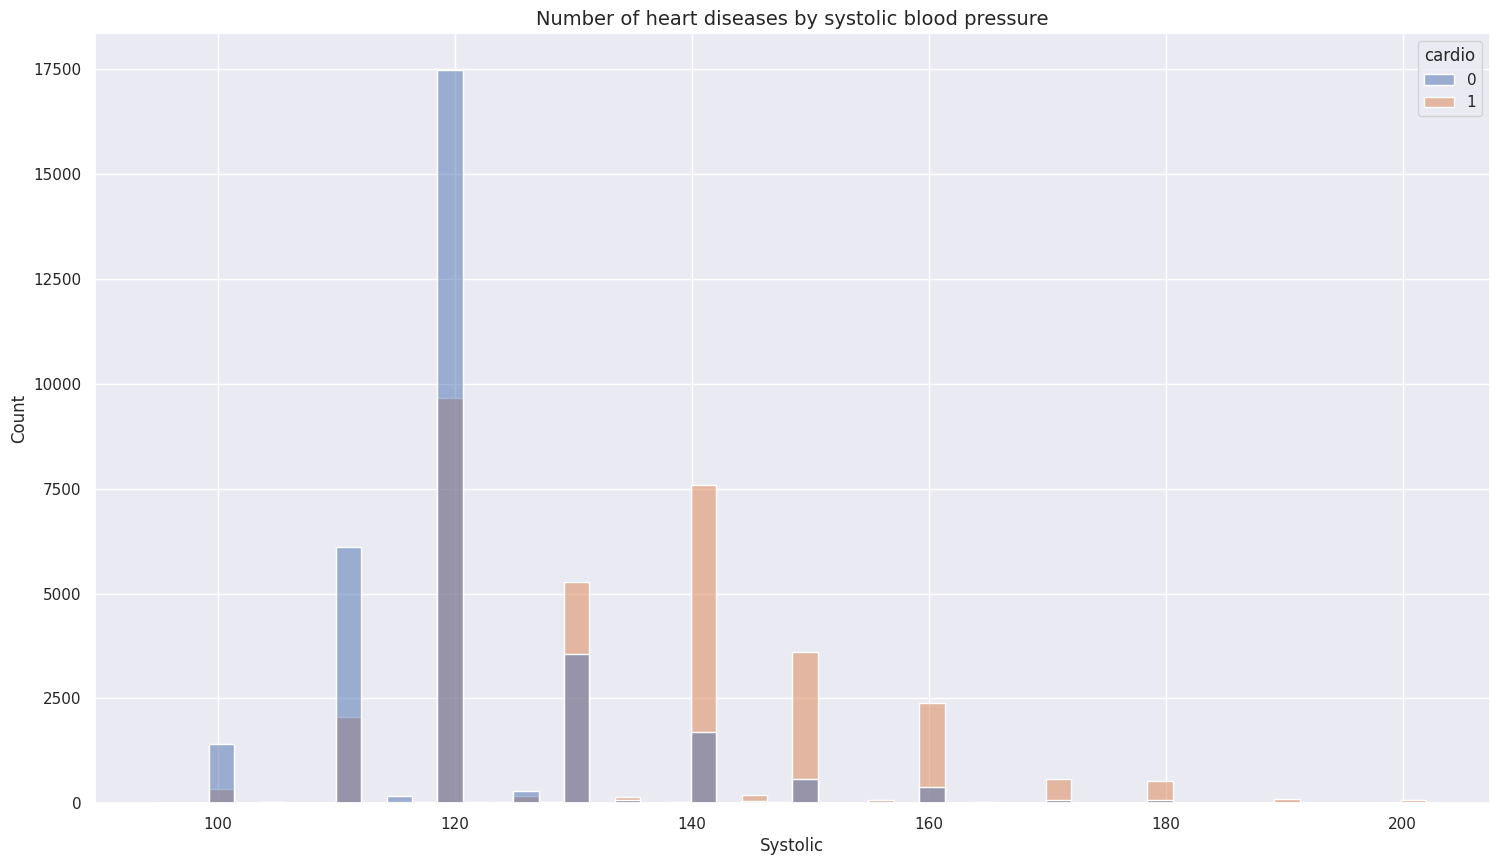

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='ap_hi', hue='cardio', data=df_ccd, bins=50)

# sets plot features
plt.title("Number of heart diseases by systolic blood pressure", fontsize=14)
plt.xlabel("Systolic")
plt.ylabel("Count")

# display plot
plt.show()

As observed, there are more cases for people that presents high blood pressure.



#### H11. How are the cases of heart diseases distributed among diastolic blood pressures?


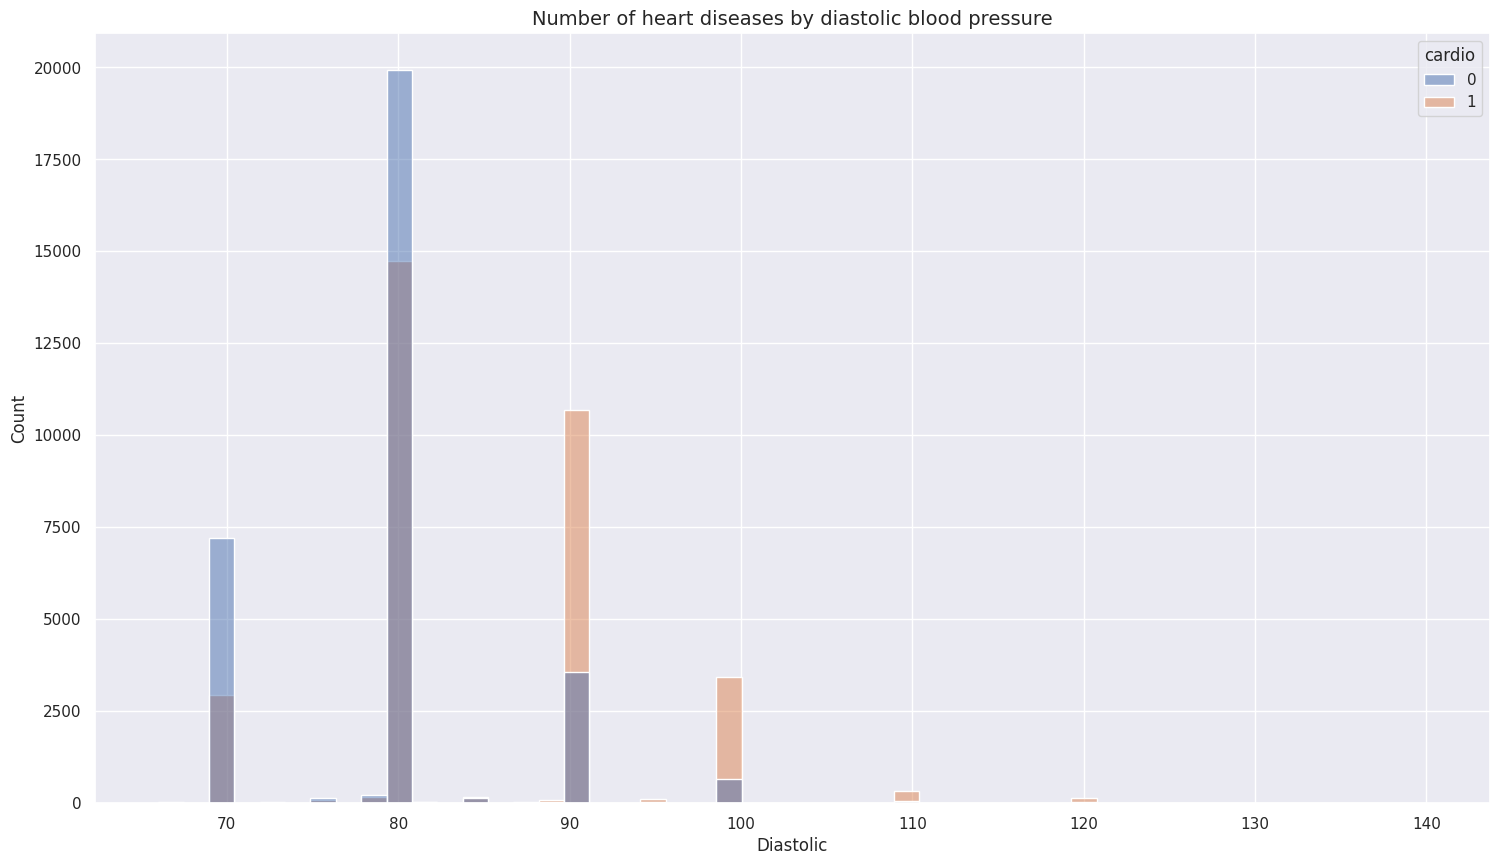

In [ ]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='ap_lo', hue='cardio', data=df_ccd, bins=50)

# sets plot features
plt.title("Number of heart diseases by diastolic blood pressure", fontsize=14)
plt.xlabel("Diastolic")
plt.ylabel("Count")

# display plot
plt.show()

As observed, there are more cases for people that presents high blood pressure.



**Hypotheses Summary**


H1	There are less cases of heart diseases among young people (up to 30s)	TRUE

H2	The cases of heart diseases does not significantly depend on the height	FALSE

H3	The higher the weight, the higher is the cases of heart diseases	TRUE

H4	The cases of heart diseases does not significantly depend on the gender	FALSE

H5	There are more cases of heart diseases for people presenting well above normal levels of cholesterol	TRUE

H6	There are more cases of heart diseases for people presenting well above normal levels of glucose	TRUE

H7	The are more cases of heart diseases for people who smokes than for people who does not	FALSE

H8	The are more cases of heart diseases for people who intakes alcohol than for people who does not	FALSE

H9	The are more cases of heart diseases for people who does not do any physical activity than for people who does	TRUE

H10	How are the cases of heart diseases distributed among systolic blood pressures?	As observed, there are more cases for people that presents high blood pressure

H11	How are the cases of heart diseases distributed among diastolic blood pressures	As observed, there are more cases for people that presents high blood pressure


### **Correlation**

Correlation refers to a relationship between two things, where they tend to happen together or change together.

For example, there may be a correlation between exercise and weight loss - people who exercise regularly tend to lose weight.

Correlation is measured on a scale from -1 to +1. A correlation of +1 means that the two things are perfectly related and move in the same direction. A correlation of -1 means that the two things are perfectly related but move in opposite directions. A correlation of 0 means that there is no relationship between the two things.

#### **Multivariate analysis - Correlations**


Multivariate analysis is a statistical method used to analyze the relationships between multiple variables in a dataset.

Correlation analysis is one of the most commonly used multivariate analysis techniques to investigate the association between two or more variables.

Correlation is a measure of the strength and direction of the relationship between two variables. It helps to understand whether and how much two variables are related. Correlation coefficients range from -1 to 1.

A correlation coefficient of -1 indicates a perfect negative correlation, meaning that the variables move in opposite directions.

A correlation coefficient of 1 indicates a perfect positive correlation, meaning that the variables move in the same direction. A correlation coefficient of 0 indicates no correlation between the variables.

Multivariate correlation analysis is used to determine whether and how strongly two or more variables are related to each other. This analysis helps to identify the patterns and relationships among multiple variables, which can provide insights into the underlying structure of the data.

In addition to the Pearson correlation coefficient, which measures the linear relationship between two variables, other correlation measures can be used in multivariate correlation analysis. For example, Spearman's rank correlation coefficient can be used to measure the strength of the association between two variables when they are not normally distributed, or when the relationship between the variables is not linear.

Overall, multivariate correlation analysis is a powerful tool in data analysis, helping to identify patterns and relationships among multiple variables, and to gain insights into the underlying structure of the data.

### **Separating and transforming dtypes**


In addition, we're going to drop the age_years column because we're not going to use it anymore.

We're are also going to drop the id columns, since it does not give any useful information.

In [ ]:
# drops unuseful cols
df_ccd.drop(['id','age_years'], axis=1, inplace=True)
df_ccd.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_diff,weight_status,blood_pressure
0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,21.967120,0.267120,normal,high stage one
1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,34.927679,13.227679,obese,high stage two
2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,23.507805,1.807805,normal,high stage one
3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,28.710479,7.010479,normal,high stage two
4,21914,1,151,67.000000,120,80,2,2,0,0,0,0,29.384676,7.684676,normal,high stage one


In [ ]:
# gets only the numerical attributes
numerical_vars = df_ccd[['age','height','weight','ap_hi','ap_lo', 'bmi', 'bmi_diff']]

# gets only the categorical attributes
categorical_vars = df_ccd[['gender','cholesterol','gluc', 'weight_status', 'blood_pressure']]

# gets only the binary attributes
binary_vars = df_ccd[['smoke','alco','active']]

We'll apply some dtypes transformations, so it'll be easier to make the correlations.



In [ ]:

# sets string categories for gender
categorical_vars['gender'] = categorical_vars['gender'].apply(lambda x: 'A' if x == 1 else 'B')

# converts gender to categorical dtype
categorical_vars['gender'] = categorical_vars['gender'].astype('category')

# sets string categories for cholesterol
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].apply(lambda x: 'normal' if x == 1
                                                                        else 'above normal' if x == 2
                                                                        else 'well above normal')

# converts cholesterol to categorical dtype
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].astype('category')

# sets string categories for glucose
categorical_vars['gluc'] = categorical_vars['gluc'].apply(lambda x: 'normal' if x == 1
                                                                else 'above normal' if x == 2
                                                                else 'well above normal')
# converts glucose to categorical dtype
categorical_vars['gluc'] = categorical_vars['gluc'].astype('category')

<ipython-input-59-e4776465764b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gender'] = categorical_vars['gender'].apply(lambda x: 'A' if x == 1 else 'B')
<ipython-input-59-e4776465764b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gender'] = categorical_vars['gender'].astype('category')
<ipython-input-59-e4776465764b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

#### **Correlation between numerical attributes (explanatory vars)**


In [ ]:
# checks numerical info
numerical_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65409 entries, 0 to 65408
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       65409 non-null  int64  
 1   height    65409 non-null  int64  
 2   weight    65409 non-null  float64
 3   ap_hi     65409 non-null  int64  
 4   ap_lo     65409 non-null  int64  
 5   bmi       65409 non-null  float64
 6   bmi_diff  65409 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.5 MB


<ipython-input-61-13077722e10b>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlations, dtype=np.bool))


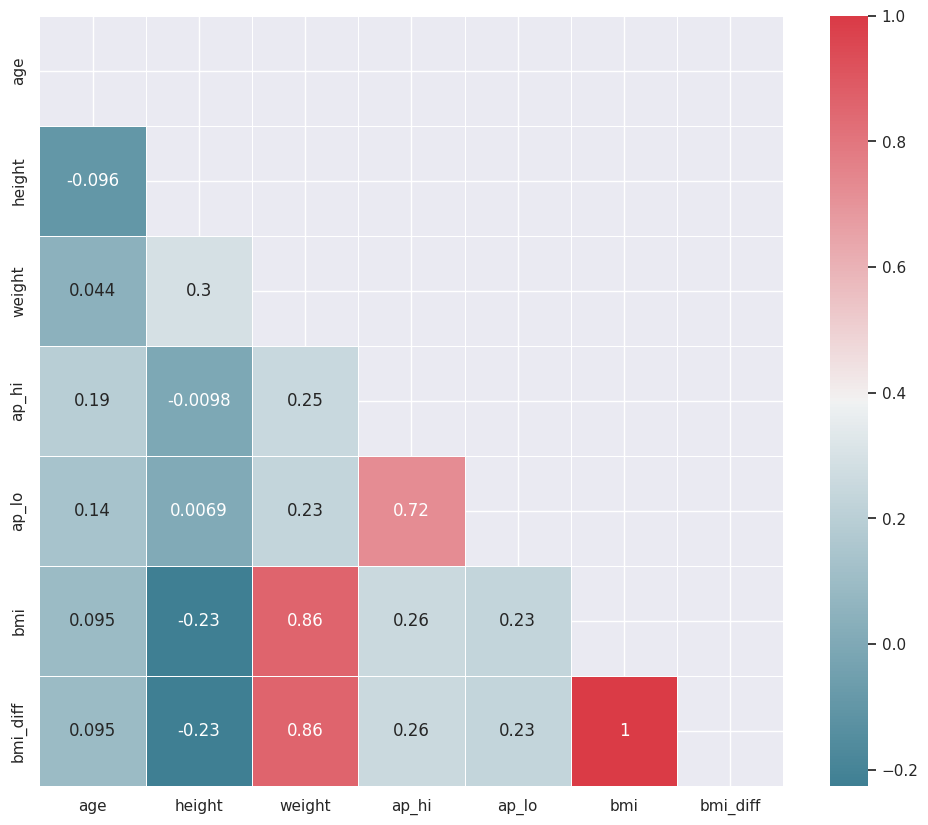

In [ ]:
# calcultes the correlations
correlations = numerical_vars.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(12, 10)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlations, cmap=cmap, mask=mask, linewidths=.5, annot=True)

# displays the plot
plt.show()

Key points:

ap_hi and ap_lo present strong positive correlation (0.72).

bmi and weight present strong positive correlation (0.86).

### **Data preprocessing**

In [ ]:
# loads the data set
df_ccd = pd.read_csv('/content/drive/MyDrive/ccd_fe.csv', low_memory=False)

# saves the id for later usage
df_id = [['id']]

# drops unuseful cols
df_ccd.drop(['id','age_years'], axis=1, inplace=True)

# checks data set dimension
df_ccd.shape

(65409, 16)

In [ ]:
df_ccd.sample()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_diff,weight_status,blood_pressure
32021,21808,1,163,62.000000,130,90,1,1,0,0,1,1,23.335466,1.635466,normal,high stage one


#### **Set up attributes for preprocessing**


Here we are mapping these integer values to string categories, it gets easier to work with and analyze the data, especially when it comes to plotting and visualizing the data.

It can also help to ensure that any machine learning models built on this data are accurate and reliable, as models can struggle with numerical values that do not have any ordinal or interval meaning.

In [ ]:
# sets string categories for gender
df_ccd['gender'] = df_ccd['gender'].apply(lambda x: 'A' if x == 1 else 'B')


# sets string categories for glucose
df_ccd['gluc'] = df_ccd['gluc'].apply(lambda x: 'normal' if x == 1
                                      else 'above normal' if x == 2
                                      else 'well above normal')


# sets string categories for cholesterol
df_ccd['cholesterol'] = df_ccd['cholesterol'].apply(lambda x: 'normal' if x == 1
                                                    else 'above normal' if x == 2
                                                    else 'well above normal')

#### **Split data set into train and test**

Splitting a dataset into a training set and a testing set allows us to evaluate the performance of a machine learning model on unseen data.

1. The training set is used to train the model and the testing set is used to evaluate its performance.

2. The requirement for splitting a dataset into a training and testing set is to ensure that the model is not overfitting or underfitting the data. Overfitting occurs when a model learns the training data too well and performs poorly on new, unseen data. Underfitting occurs when a model is too simple and does not capture the underlying patterns in the data.

3. To avoid overfitting, we need to evaluate the performance of the model on a dataset that it has not seen before. This is why we split the original dataset into two separate datasets - one for training the model and another for testing it. We train the model on the training dataset and then evaluate its performance on the testing dataset.

4. The typical split for a dataset is 80/20, where 80% of the data is used for training the model and 20% is used for testing. However, this split can vary depending on the size of the dataset and the complexity of the model being trained. In some cases, a 70/30 or 60/40 split may be more appropriate.

5. The training and testing datasets should be selected randomly from the original dataset to ensure that the samples are representative of the entire dataset. We also need to ensure that the samples are independent of each other, meaning that there is no correlation between the samples in the training and testing datasets.

In summary, splitting a dataset into a training and testing set is important for evaluating the performance of a machine learning model and avoiding overfitting or underfitting. The datasets should be randomly selected and independent of each other, with a split that depends on the size of the dataset and the complexity of the model.

In [ ]:
# separates data
X = df_ccd.drop(['cardio'], axis=1).copy()
y = df_ccd[['cardio']].copy()

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)


#### **Scaling numerical vars**


Scaling numerical variables is an important step in data preprocessing that is used to normalize the data and bring all the variables onto the same scale.

The requirement for scaling numerical variables is to ensure that the range of values for each variable is similar. If the range of values is not similar, then some variables may dominate the others in a statistical model, leading to incorrect conclusions.

Scaling can be performed using various methods, such as standardization, normalization, or min-max scaling.

- Standardization involves transforming the data so that it has a mean of zero and a standard deviation of one. This method is commonly used in machine learning, as it helps to ensure that the variables have similar ranges and improves the performance of models that are sensitive to the scale of the input variables.

- Normalization is a method that rescales the data into a range of 0 to 1. This method is useful when the distribution of the data is not Gaussian, and when the minimum and maximum values are known.

- Min-max scaling is a method that scales the data to a fixed range, usually between 0 and 1. This method is useful when we want to preserve the relationship between the original values and the scaled values.

By scaling the numerical variables in a dataset, we can improve the accuracy of our models, speed up the training process, and reduce the impact of outliers.

However, it is important to note that scaling is not always necessary or appropriate, and should be used only when it makes sense for the specific problem at hand. For example, some algorithms, such as decision trees, are not sensitive to the scale of the input variables and do not require scaling.

In [ ]:
# separates the vars that will be scaled
train_vars_to_scale = X_train[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'bmi_diff']]
test_vars_to_scale = X_test[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'bmi_diff']]

In [ ]:
# instantiates the scaler
mms_scaler = MinMaxScaler()

In [ ]:
# scales the data
mms_scaler.fit(train_vars_to_scale)
train_numerical_scaled = mms_scaler.transform(train_vars_to_scale)
test_numerical_scaled = mms_scaler.transform(test_vars_to_scale)


In [ ]:
# converts scaled data to DataFrame for better readability
train_numerical_scaled = pd.DataFrame(train_numerical_scaled, columns=train_vars_to_scale.columns)
test_numerical_scaled = pd.DataFrame(test_numerical_scaled, columns=test_vars_to_scale.columns)

#### **Transformation**

Transformation is an important step in data preprocessing that involves applying mathematical functions to the data to change its shape or distribution. The goal of transformation is to make the data more suitable for analysis, modeling, or visualization.

There are several types of transformations that can be applied to a given dataset, including:

- Log transformation: This involves taking the logarithm of the data. Log transformation is useful for data that has a wide range of values and is skewed to the right. This transformation can help to reduce the range of values and make the data more normally distributed.

- Box-Cox transformation: This is a family of power transformations that can be used to normalize data. The Box-Cox transformation is useful for data that is not normally distributed and has a positive skew. It works by transforming the data to a normal distribution by selecting the value of the lambda parameter that gives the best transformation.

- Square root transformation: This involves taking the square root of the data. Square root transformation is useful for data that has a positive skew and a wide range of values. This transformation can help to reduce the range of values and make the data more normally distributed.

- Z-score normalization: This involves subtracting the mean of the data and dividing by the standard deviation. This transformation can help to normalize the data and make it more suitable for analysis or modeling.

- Power transformation: This involves raising the data to a power. Power transformation can be useful for data that has a positive skew or a wide range of values. It can help to reduce the range of values and make the data more normally distributed.

By applying transformation techniques to a given dataset, we can improve the performance of statistical models, reduce the impact of outliers, and gain insights from the data that may have been hidden before transformation. However, it is important to choose the appropriate transformation technique for the specific dataset and problem at hand, and to carefully evaluate the impact of the transformation on the results of the analysis.

#### **Encoding categorical data**

Encoding categorical data in data preprocessing involves converting categorical variables (i.e., variables that take on a limited set of discrete values) into numerical variables that can be used in statistical models. There are two common methods for encoding categorical data:

1. One-hot encoding:

- This involves creating a new binary variable for each category of the categorical variable. For example, if a categorical variable has three categories (e.g., red, green, blue), one-hot encoding would create three new binary variables (e.g., is_red, is_green, is_blue), where each variable would have a value of 1 if the original variable was in that category, and a value of 0 otherwise.

- One-hot encoding is useful for categorical variables that do not have an inherent order or hierarchy.

2. Label encoding:

- This involves assigning a numerical value to each category of the categorical variable.
- For example, if a categorical variable has three categories (e.g., small, medium, large), label encoding would assign the values 0, 1, and 2 to each category, respectively. Label encoding is useful for categorical variables that have an inherent order or hierarchy.

One-hot encoding can be useful for preserving the information in the original categorical variable and avoiding any assumptions about the order or hierarchy of the categories. However, it can also lead to a large number of new variables (and potentially sparsity) when the categorical variable has many categories.

Label encoding, on the other hand, can be useful for preserving the order or hierarchy of the categories and reducing the number of variables needed to represent the categorical variable. However, it can also introduce assumptions about the distance between categories that may not be accurate.

When encoding categorical data, it is important to carefully consider the nature of the categorical variable and choose the appropriate encoding method for the specific dataset and problem at hand. Additionally, it is important to evaluate the impact of the encoding on the results of the analysis, as different encoding methods can have different effects on statistical models and other data analysis techniques.

In [ ]:
# gets categorical vars
train_categorical_vars = X_train[['gender']]
test_categorical_vars = X_test[['gender']]

# resets the index
train_categorical_vars.reset_index(drop=True, inplace=True)
test_categorical_vars.reset_index(drop=True, inplace=True)

# one hot encoding
train_categorical_encoded = pd.get_dummies(train_categorical_vars, drop_first=True)
test_categorical_encoded = pd.get_dummies(test_categorical_vars, drop_first=True)

In [ ]:
# As the binary vars are already encoded as 1s and 0s, there is no need to do the one-hot encoding
train_binary_vars = X_train[['smoke','alco','active']]
test_binary_vars = X_test[['smoke','alco','active']]

# resets index
train_binary_vars.reset_index(drop=True, inplace=True)
test_binary_vars.reset_index(drop=True, inplace=True)

#### **Frequency encoding categorical attributes - Train data set**

Frequency encoding is a method of encoding categorical variables by replacing each category with the frequency of its occurrence in the dataset.

In other words, each category is replaced by the number of times it appears in the dataset. This encoding can be useful when the frequency of each category provides meaningful information about the variable being encoded.

To apply frequency encoding to a categorical variable in a training dataset, the following steps can be taken:

1. Count the frequency of each category in the training dataset.
2. Create a dictionary where each category is mapped to its frequency.
3. Replace each category in the training dataset with its corresponding frequency using the dictionary.

For example, suppose we have a categorical variable "color" with the following values in our training dataset:

Red

Blue

Green

Blue

Blue

Yellow

To apply frequency encoding to this variable, we would count the frequency of each category:

Red: 1

Blue: 3

Green: 1

Yellow: 1

Then, we would create a dictionary mapping each category to its frequency:

{'Red': 1, 'Blue': 3, 'Green': 1, 'Yellow': 1}

Finally, we would replace each category in the training dataset with its corresponding frequency using the dictionary:

1

3

1

3

3

1

The resulting encoded variable can then be used in machine learning models, just like any other numerical variable.

It is important to note that frequency encoding can lead to overfitting if there are categories that appear only a few times in the training dataset.

To address this issue, one approach is to use smoothing, where a small value (e.g., 1) is added to each frequency to avoid zero counts.

Another approach is to use target encoding, which is a similar encoding method that takes into account the relationship between the categorical variable and the target variable.

In [ ]:
X_train['cholesterol'].value_counts()


normal               36688
above normal          6564
well above normal     5804
Name: cholesterol, dtype: int64

In [ ]:
X_train['gluc'].value_counts()


normal               41587
well above normal     3849
above normal          3620
Name: gluc, dtype: int64

In [ ]:
X_train['weight_status'].value_counts()


normal         34202
obese          13244
overweight      1251
underweight      359
Name: weight_status, dtype: int64

In [ ]:
X_train['blood_pressure'].value_counts()


high stage one         29753
high stage two         12038
normal                  5308
elevated                1869
hypertensive crisis       88
Name: blood_pressure, dtype: int64

In [ ]:
# filters categorical attributes
train_cat_att_freq = X_train[['cholesterol','gluc','weight_status','blood_pressure']]

# resets the index
train_cat_att_freq.reset_index(drop=True, inplace=True)

In [ ]:
# creates a dictionary from value counts
count_dict_cholesterol = train_cat_att_freq['cholesterol'].value_counts().to_dict()

# stores values as DataFrame
df_count_cholesterol = pd.DataFrame(count_dict_cholesterol.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_cholesterol['frequency'] = df_count_cholesterol['Count'] / df_count_cholesterol['Count'].sum()


# creates a dictionary from value counts
count_dict_gluc = train_cat_att_freq['gluc'].value_counts().to_dict()

# stores values as DataFrame
df_count_gluc = pd.DataFrame(count_dict_gluc.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_gluc['frequency'] = df_count_gluc['Count'] / df_count_gluc['Count'].sum()


# creates a dictionary from value counts
count_dict_weight_status = train_cat_att_freq['weight_status'].value_counts().to_dict()

# stores values as DataFrame
df_count_weight_status = pd.DataFrame(count_dict_weight_status.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_weight_status['frequency'] = df_count_weight_status['Count'] / df_count_weight_status['Count'].sum()


# creates a dictionary from value counts
count_dict_blood_pressure = train_cat_att_freq['blood_pressure'].value_counts().to_dict()

# stores values as DataFrame
df_count_blood_pressure = pd.DataFrame(count_dict_blood_pressure.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_blood_pressure['frequency'] = df_count_blood_pressure['Count'] / df_count_blood_pressure['Count'].sum()

In [ ]:
# gets a dictionary for the frequency
frequency_cholesterol = df_count_cholesterol.set_index('Value').to_dict()['frequency']
frequency_gluc = df_count_gluc.set_index('Value').to_dict()['frequency']
frequency_weight_status = df_count_weight_status.set_index('Value').to_dict()['frequency']
frequency_blood_pressure = df_count_blood_pressure.set_index('Value').to_dict()['frequency']

In [ ]:
# creates an empty DataFrame
train_cat_attr_freq_encoded = pd.DataFrame()

# creates a columns for frequency
train_cat_attr_freq_encoded['cholesterol'] =  train_cat_att_freq['cholesterol'].map(frequency_cholesterol)
train_cat_attr_freq_encoded['gluc'] =  train_cat_att_freq['gluc'].map(frequency_gluc)
train_cat_attr_freq_encoded['weight_status'] =  train_cat_att_freq['weight_status'].map(frequency_weight_status)
train_cat_attr_freq_encoded['blood_pressure'] =  train_cat_att_freq['blood_pressure'].map(frequency_blood_pressure)

#### **Joining everything - Train data set**


In [ ]:
X_train_prep = pd.concat([train_numerical_scaled, train_binary_vars, train_categorical_encoded, train_cat_attr_freq_encoded], axis=1)


#### **Frequency encoding categorical attributes - Test data set**

In [ ]:
# filters categorical attributes
test_cat_att_freq = X_test[['cholesterol','gluc','weight_status','blood_pressure']]

# resets the index
test_cat_att_freq.reset_index(drop=True, inplace=True)

In [ ]:
# creates a dictionary from value counts
count_dict_cholesterol = test_cat_att_freq['cholesterol'].value_counts().to_dict()

# stores values as DataFrame
df_count_cholesterol = pd.DataFrame(count_dict_cholesterol.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_cholesterol['frequency'] = df_count_cholesterol['Count'] / df_count_cholesterol['Count'].sum()


# creates a dictionary from value counts
count_dict_gluc = test_cat_att_freq['gluc'].value_counts().to_dict()

# stores values as DataFrame
df_count_gluc = pd.DataFrame(count_dict_gluc.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_gluc['frequency'] = df_count_gluc['Count'] / df_count_gluc['Count'].sum()


# creates a dictionary from value counts
count_dict_weight_status = test_cat_att_freq['weight_status'].value_counts().to_dict()

# stores values as DataFrame
df_count_weight_status = pd.DataFrame(count_dict_weight_status.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_weight_status['frequency'] = df_count_weight_status['Count'] / df_count_weight_status['Count'].sum()


# creates a dictionary from value counts
count_dict_blood_pressure = test_cat_att_freq['blood_pressure'].value_counts().to_dict()

# stores values as DataFrame
df_count_blood_pressure = pd.DataFrame(count_dict_blood_pressure.items(), columns=['Value','Count'])

# calculates the frequency for each value
df_count_blood_pressure['frequency'] = df_count_blood_pressure['Count'] / df_count_blood_pressure['Count'].sum()

In [ ]:
# gets a dictionary for the frequency
frequency_cholesterol = df_count_cholesterol.set_index('Value').to_dict()['frequency']
frequency_gluc = df_count_gluc.set_index('Value').to_dict()['frequency']
frequency_weight_status = df_count_weight_status.set_index('Value').to_dict()['frequency']
frequency_blood_pressure = df_count_blood_pressure.set_index('Value').to_dict()['frequency']

In [ ]:
# creates an empty DataFrame
test_cat_attr_freq_encoded = pd.DataFrame()

# creates a columns for frequency
test_cat_attr_freq_encoded['cholesterol'] =  test_cat_att_freq['cholesterol'].map(frequency_cholesterol)
test_cat_attr_freq_encoded['gluc'] =  test_cat_att_freq['gluc'].map(frequency_gluc)
test_cat_attr_freq_encoded['weight_status'] =  test_cat_att_freq['weight_status'].map(frequency_weight_status)
test_cat_attr_freq_encoded['blood_pressure'] =  test_cat_att_freq['blood_pressure'].map(frequency_blood_pressure)

#### **Joining everything - Test data set**

In [ ]:
# concatenates the data sets
X_test_prep = pd.concat([test_numerical_scaled, test_binary_vars, test_categorical_encoded, test_cat_attr_freq_encoded], axis=1)


In [ ]:

# saves data set state
X_train_prep.to_csv('/content/drive/MyDrive/ccd_prep_train.csv', index=False)
X_test_prep.to_csv('/content/drive/MyDrive/ccd_prep_test.csv', index=False)

### **Machine Learning Modeling**

Target variable: var (0 = no cardiovascular disease ; 1 = cardiovascular disease)


#### **Loading data set**

In [ ]:
# loads the data sets
X_train_prep = pd.read_csv('/content/drive/MyDrive/ccd_prep_train.csv', low_memory=False)
X_test_prep = pd.read_csv('/content/drive/MyDrive/ccd_prep_test.csv', low_memory=False)
X_train_prep.shape

(49056, 15)

#### **Balancing data for training**


We know that the data set is fairly balanced, as an experiment, we'll resample the classes by applying the SMOTE + Tomek-Links technique to see what results we can get.

The minority class refers to the class of interest that has fewer instances or samples in the dataset, while the majority class refers to the class that has more instances or samples in the dataset.

1. SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique used to address class imbalance in datasets.

- It generates synthetic samples of the minority class by interpolating between existing minority class samples. The idea is to create new examples of the minority class that are similar to existing ones, but not identical, in order to increase the diversity of the data.

2.  Tomek Links, on the other hand, is an undersampling technique that removes examples from the majority class that are close to examples in the minority class. The idea is to remove the examples that are causing overlap between the two classes, in order to make the decision boundary between them more distinct.

SMOTE + Tomek Links is a combination of these two techniques that involves oversampling the minority class with SMOTE, and then undersampling both the minority and majority classes using Tomek Links. This can help to address both class imbalance and the problem of overlapping classes.

The steps involved in applying SMOTE + Tomek Links are as follows:

1. Apply SMOTE to the minority class to generate synthetic samples.
2. Identify Tomek Links between the minority and majority classes.
3. Remove the examples from the majority class that are connected by Tomek Links to the minority class.
4. Remove any remaining examples from the minority class that are connected by Tomek Links to the majority class.
5. The resulting dataset will have a reduced number of examples overall, but with a more balanced class distribution and a clearer separation between the classes.

It is important to note that SMOTE + Tomek Links may not be suitable for all datasets, and that it is always important to evaluate the performance of any data augmentation technique on a holdout validation set before using it on the test set or in production.

In [ ]:
# counts the classes values before balancing
y_train['cardio'].value_counts()

1    24852
0    24204
Name: cardio, dtype: int64

In [ ]:
# defines the resampler
resampler = SMOTETomek(random_state=SEED, n_jobs=-1)

# makes the balancing
X_balanced, y_balanced = resampler.fit_resample(X_train_prep, y_train)

/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
# counts the classes values after balancing
y_balanced['cardio'].value_counts()

0    20062
1    20062
Name: cardio, dtype: int64

#### **Training the models and getting the performance metrics**

Select an appropriate algorithm for the problem at hand and train it on the training set. The algorithm should be optimized to minimize the error or maximize the accuracy, depending on the problem.

1. **Logistic Regression** :

- A classification algorithm used to predict the probability of a binary outcome (e.g., whether a customer will churn or not), given a set of predictor variables.

- Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict the probability of an event occurring (represented by the positive class) given a set of predictor variables. The logistic regression model is a type of generalized linear model, which uses a logistic function (also called the sigmoid function) to model the relationship between the predictor variables and the probability of the positive class.

- The logistic function maps any real-valued input to a value between 0 and 1, which can be interpreted as the probability of the positive class. The logistic regression model estimates the coefficients for each predictor variable that maximize the likelihood of the observed data, and uses these coefficients to make predictions on new data.

- Logistic Regression has several advantages, including being easy to implement and interpret, and can handle both categorical and numerical predictor variables. It also performs well on linearly separable data and is not affected by outliers.

However, logistic regression assumes a linear relationship between the predictor variables and the log-odds of the positive class. It can also suffer from overfitting if the model is too complex or if there are too many predictor variables.

2. **Decision Tree** :

- Decision Tree is a widely used machine learning algorithm for solving classification and regression problems. It is a type of supervised learning algorithm that works by recursively partitioning the data into smaller and smaller subsets based on the values of the predictor variables.

- In a decision tree, each internal node represents a test on a particular feature, each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value. The goal of the algorithm is to create a tree that makes the most accurate predictions on the training data, and can generalize well to unseen data.

- The decision tree algorithm has several advantages, such as being easy to interpret, handling both categorical and numerical data, and requiring little data preparation. It is also able to handle missing values and outliers, and can capture non-linear relationships between the predictor variables and the target variable.

- However, decision trees can suffer from overfitting if the tree is too complex, and may not perform well on data that has not been seen before. To address this issue, ensemble methods like Random Forests and Boosted Trees can be used, which combine multiple decision trees to improve the accuracy and reduce overfitting.

3. **Random Forest** :

- An ensemble algorithm that combines multiple decision trees to improve the accuracy and reduce overfitting. It is commonly used for classification and regression problems.

- Random Forest is used for both regression and classification tasks. It is a type of ensemble learning method, which combines multiple decision trees to create a more robust and accurate model.

- In a Random Forest, a large number of decision trees are trained on random subsets of the training data. Each decision tree is trained on a different subset of the features, which helps to reduce the correlation between the trees and prevent overfitting.

- During the prediction phase, each tree in the Random Forest independently predicts the output variable based on the input data. The final prediction is then determined by aggregating the predictions of all the trees, either by taking the mean of the outputs in regression tasks or by selecting the majority vote in classification tasks.

- The Random Forest algorithm has several advantages over traditional decision trees, including:

1. Robustness: The algorithm is less susceptible to overfitting compared to a single decision tree.

2. Accuracy: By aggregating the predictions of multiple decision trees, the algorithm tends to produce more accurate predictions.

3. Flexibility: The algorithm can be used for both regression and classification tasks and can handle both continuous and categorical variables.

4. Feature Importance: The algorithm provides information on the importance of each feature, which can be useful in feature selection and data analysis.

4. **XGBoost** (Extreme Gradient Boosting):

- In Gradient Boosting, each decision tree tries to improve on the mistakes of the previous tree, by focusing on the samples that were misclassified. This is done by adjusting the weights of the misclassified samples, so that the next tree focuses more on those samples. Over time, the model becomes more accurate and can make better predictions.

- XGBoost is a machine learning algorithm that can help you build a model to make predictions about things like stock prices, disease diagnosis, or customer behavior. It's looks at lots of data and makes a good guess about what's going to happen next.

- XGBoost works by creating lots of decision trees that learn from the data, and then combining those trees to make a better prediction. Each tree tries to fix the mistakes of the previous tree, so that the overall prediction becomes more accurate over time.

- It can  figure out which factors are most important for making a good prediction, and it can do all of this really quickly.

- One of the main strengths of XGBoost is its ability to handle complex, high-dimensional datasets with a large number of features. It achieves this by using a combination of regularization techniques, such as L1 and L2 regularization, which help to reduce the impact of noisy or irrelevant features.

- L1 regularization works by adding a penalty term to the loss function of a model, which forces the model to use fewer features. This is done by adding up the absolute values of the model's weights and adding it to the loss function. This penalty term encourages the model to use only the most important features, while shrinking the weights of less important features to zero.

- L2 regularization works in a similar way, but instead of adding up the absolute values of the weights, it adds up the squares of the weights. This has the effect of shrinking all the weights towards zero, but not necessarily to zero, as with L1 regularization. This encourages the model to use all the features, but to give less weight to the less important features.

5. **Balanced Random Forest** :

- An extension of the random forest algorithm that is designed to handle imbalanced datasets by assigning higher weights to minority class samples.

- Assigning higher weights to the minority class samples is a technique that involves giving more importance to the minority class samples during model training, so that the model learns to pay more attention to these samples and make better predictions for that class.

6. **CatBoost**:

- A gradient boosting algorithm that is specifically designed for categorical variables. It is known for its ability to handle large datasets and produce accurate results.

- Prevents overfitting that can occur when encoding is done improperly.

7. **k-Nearest Neighbors**:

- A non-parametric classification algorithm that predicts the class of a new data point based on the class of its k-nearest neighbors in the training data.

- To give an example, imagine you're trying to predict whether a new customer will buy a product based on their age and income. You have a dataset of existing customers and their ages and incomes, and you want to use this data to make a prediction for the new customer.

- With KNN, you would start by selecting a value for k (the number of nearest neighbors to consider). Let's say you choose k = 3. Then, you would find the 3 existing customers in your dataset who are closest in terms of age and income to the new customer. You could then look at those 3 customers and see if they bought the product or not. If 2 of them bought the product, and 1 did not, you would predict that the new customer is likely to buy the product as well.

- This is the basic idea behind KNN: it looks for similarities between data points and uses those similarities to make predictions. The value of k can be adjusted depending on the specific problem and the amount of data available, and different distance metrics can be used to calculate the similarity between data points.

8. **Stochastic Gradient Descent (SGD)**:

- An iterative optimization algorithm that is commonly used for training large-scale machine learning models. It is particularly well-suited for problems with many parameters and large datasets.

- It works by adjusting the weights of the model based on the error between the predicted output and the actual output, and doing so iteratively until the error is minimized.

- To give an example, imagine you are trying to train a model to predict whether a given image contains a cat or not. Your model takes in the pixels of the image as input, and produces a binary output (cat or not cat). Initially, the weights of the model are randomly assigned, and the output is likely to be far from the correct answer.

- To train the model using SGD, you would start by selecting a small batch of images from your dataset (typically around 32 or 64), and feeding them through the model. You would then compare the predicted output to the actual output, and calculate the error between them.

- Using this error, you can adjust the weights of the model slightly in the direction that reduces the error. This process is repeated for each batch of images, gradually improving the model's performance as it sees more examples. The "stochastic" part of SGD comes from the fact that the batches are selected randomly from the dataset, rather than in a pre-determined order.

9. **LightGBM**:

- A gradient boosting algorithm that is designed for high-performance, large-scale problems. It is known for its ability to handle sparse datasets and produce fast, accurate results.

- At a high level, LightGBM works by building a series of decision trees, each of which tries to improve on the mistakes of the previous tree. The key innovation of LightGBM is that it uses a technique called Gradient-Based One-Side Sampling (GOSS) to speed up the training process. GOSS involves selectively sampling the training data based on the gradient of the loss function, so that only the most informative data points are used to train each tree.

- GOSS works by focusing on the samples in the dataset that are most informative for building a good model, and ignoring the samples that are less important. It can also help to prevent overfitting, which can occur when there are too many similar samples in the dataset.

- Another important feature of LightGBM is that it uses a histogram-based approach to binning the data, which allows it to process large datasets quickly and efficiently. This is because histograms can be precomputed and reused for different splits, which reduces the amount of computation required during training.

- In terms of performance, LightGBM is often faster and more accurate than other gradient boosting frameworks like XGBoost and Gradient Boosting. This is because it is designed to minimize memory usage and optimize for cache locality, which can improve training speed and reduce overfitting.

10. **Gaussian Naive Bayes**:

- A probabilistic classification algorithm that assumes independence between the predictor variables. It is commonly used for text classification and other problems with many categorical variables.

- Gaussian Naive Bayes is a machine learning algorithm used for classification tasks. It's a type of Naive Bayes algorithm that assumes the distribution of features in each class follows a Gaussian (normal) distribution.

- To give an example, imagine you're trying to classify emails as either spam or not spam based on their content. You have a dataset of emails and their associated labels (spam or not spam), and you want to use this data to build a model that can predict the label of new emails.

- With Gaussian Naive Bayes, you would start by calculating the probability of each feature (word or phrase) appearing in each class (spam or not spam), based on the training data. For example, you might calculate the probability of the word "discount" appearing in spam emails as 0.6, and the probability of it appearing in non-spam emails as 0.1.

- Once you have these probabilities, you can use Bayes' theorem to calculate the probability of a new email belonging to each class, based on the features it contains. For example, if a new email contains the word "discount", you would calculate the probability of it being spam as:

P(spam | discount) = P(discount | spam) * P(spam) / P(discount)

- Where P(discount | spam) is the probability of "discount" appearing in spam emails (0.6), P(spam) is the prior probability of a random email being spam (based on the proportion of spam emails in the training data), and P(discount) is the probability of "discount" appearing in all emails (which you can calculate by summing the probabilities of "discount" appearing in spam and non-spam emails).

- You would then repeat this process for each feature in the new email, and compare the probabilities of the email belonging to each class. The class with the highest probability would be the predicted label for the new email.

Each of these algorithms has its own strengths and weaknesses, and the choice of algorithm will depend on the specific problem at hand, the characteristics of the dataset, and the desired performance metrics. It is important to try multiple algorithms and compare their performance before selecting the best one for the task.

In [ ]:
# sets the threshold
THRESHOLD = 0.45

# defines the classifiers
classifiers = [LogisticRegression(max_iter=220, random_state=SEED),
               RandomForestClassifier(random_state=SEED),
               xgb.XGBClassifier(random_state=SEED),
               BalancedRandomForestClassifier(random_state=SEED),
               CatBoostClassifier(random_state=SEED, verbose=False),
               KNeighborsClassifier(n_neighbors=5,  weights='distance',n_jobs=-1),
               SGDClassifier(loss='log', random_state=SEED, n_jobs=-1),
               LGBMClassifier(random_state=SEED, n_jobs=-1),
               GaussianNB()]

# calculates classifiers performance
df_performance = gu.get_classifiers_performance(X_balanced, X_test_prep,
                                                np.ravel(y_balanced), np.ravel(y_test),
                                                THRESHOLD, classifiers)

Training LogisticRegression...
Training RandomForestClassifier...
Training XGBClassifier...
Training BalancedRandomForestClassifier...


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel

Training CatBoostClassifier...
Training KNeighborsClassifier...
Training SGDClassifier...
Training LGBMClassifier...


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Training GaussianNB...


In [ ]:
# highlight max values for each column
df_performance.style.highlight_max(color='Blue')

,model,precision,recall,f1-Score,ROC AUC,accuracy,cohen kappa
0,LogisticRegression,0.736702,0.703802,0.719877,0.788066,0.722497,0.445230
2,RandomForestClassifier,0.700896,0.736512,0.718263,0.773199,0.707271,0.414038
4,XGBClassifier,0.739262,0.706337,0.722425,0.790224,0.725005,0.450242
6,BalancedRandomForestClassifier,0.702998,0.738805,0.720457,0.774499,0.709533,0.418566
8,CatBoostClassifier,0.738909,0.717683,0.728141,0.793824,0.728490,0.457094
10,KNeighborsClassifier,0.685417,0.707423,0.696246,0.740036,0.687275,0.374169
12,SGDClassifier,0.717104,0.741340,0.729021,0.787331,0.720785,0.441218
14,LGBMClassifier,0.736069,0.725407,0.730699,0.795574,0.729102,0.458213
16,GaussianNB,0.725945,0.642004,0.681399,0.758037,0.695836,0.392509


- In medical diagnosis, false negative rate refers to the probability of a test failing to detect a disease or condition that is actually present in a patient.

- When we aim for recall in medical diagnosis, we are trying to minimize the false negative rate. Recall is a performance metric used in machine learning and statistics that measures the proportion of true positives (cases where the test correctly identifies the disease or condition) that are correctly identified by the model. In other words, recall tells us how many of the actual cases of the disease we are able to detect.

- By aiming for high recall, we are prioritizing the detection of all possible cases of the disease, even at the cost of higher false positives (cases where the test incorrectly identifies the disease). This is important in medical diagnosis, as false negatives can have serious consequences if a disease is left undetected and untreated.

- Therefore, when we aim for recall in medical diagnosis, we are trying to minimize the false negative rate by making sure that as many true positives as possible are correctly identified, even if this means accepting a higher false positive rate.

1. From a business perspective, the goal is to increase precision, with each additional 5% resulting in an extra $500 earned for every diagnosis made.

2. On the patient side, the objective is to increase recall and minimize the false negative rate.

### **Confusion Matrix**

- A confusion matrix is a way to measure the performance of a machine learning model, particularly for classification tasks. It allows you to see how often the model is correctly or incorrectly predicting the different classes in the data.

- To create a confusion matrix, you start by defining the classes that the model is trying to predict. Let's say for example, if you're trying to predict whether an image contains a cat or a dog, your classes would be "cat" and "dog". Then, you run the model on a set of test data and compare its predictions to the actual labels in the data.

- The confusion matrix is a table that shows the number of times the model predicted each class, and how often those predictions were correct or incorrect. Specifically, it has four entries:

1. True Positives (TP): the number of times the model correctly predicted the positive class (e.g., correctly identifying images with cats).

2. False Positives (FP): the number of times the model incorrectly predicted the positive class (e.g., incorrectly identifying images with dogs as cats).

3. True Negatives (TN): the number of times the model correctly predicted the negative class (e.g., correctly identifying images with dogs).

4. False Negatives (FN): the number of times the model incorrectly predicted the negative class (e.g., incorrectly identifying images with cats as dogs).

With this information, you can calculate various metrics that help you understand how well the model is performing, such as accuracy, precision, recall, and F1 score.

Overall, the confusion matrix is for evaluating the performance of a machine learning model, and can help you identify areas where the model is performing well or poorly.

1. Precision: Precision is the ratio of true positive predictions to the total number of positive predictions. In simpler terms, precision measures how accurate the model is when it predicts positive outcomes. A high precision score means the model is very good at predicting positive outcomes and has very few false positives.

2. Recall: Recall is the ratio of true positive predictions to the total number of actual positive outcomes. In simpler terms, recall measures how well the model can find all the positive outcomes in the data. A high recall score means the model can find most of the positive outcomes and has very few false negatives.

3. F1-Score: F1-score is the harmonic mean of precision and recall. It is a good metric to use when you want to balance precision and recall. A high F1-score means the model has high precision and high recall.

4. ROC AUC: ROC AUC stands for Receiver Operating Characteristic Area Under the Curve. It is a metric used to measure the performance of a binary classification model. ROC AUC measures how well the model can distinguish between positive and negative outcomes. A high ROC AUC score means the model is good at distinguishing between positive and negative outcomes.

5. Accuracy: Accuracy measures how well the model can predict both positive and negative outcomes. It is the ratio of correct predictions to the total number of predictions. A high accuracy score means the model is good at predicting both positive and negative outcomes.

6. Cohen's Kappa: Cohen's Kappa is a metric used to measure the agreement between the predicted values and the true values in a classification task. It takes into account the possibility of agreement by chance. A high Cohen's Kappa score means there is a strong agreement between the predicted values and the true values.

Overall, these metrics are important for evaluating the performance of machine learning models and determining which model is the best fit for a given task. Each metric has its own strengths and weaknesses, so it's important to understand what each metric measures and what the results mean.

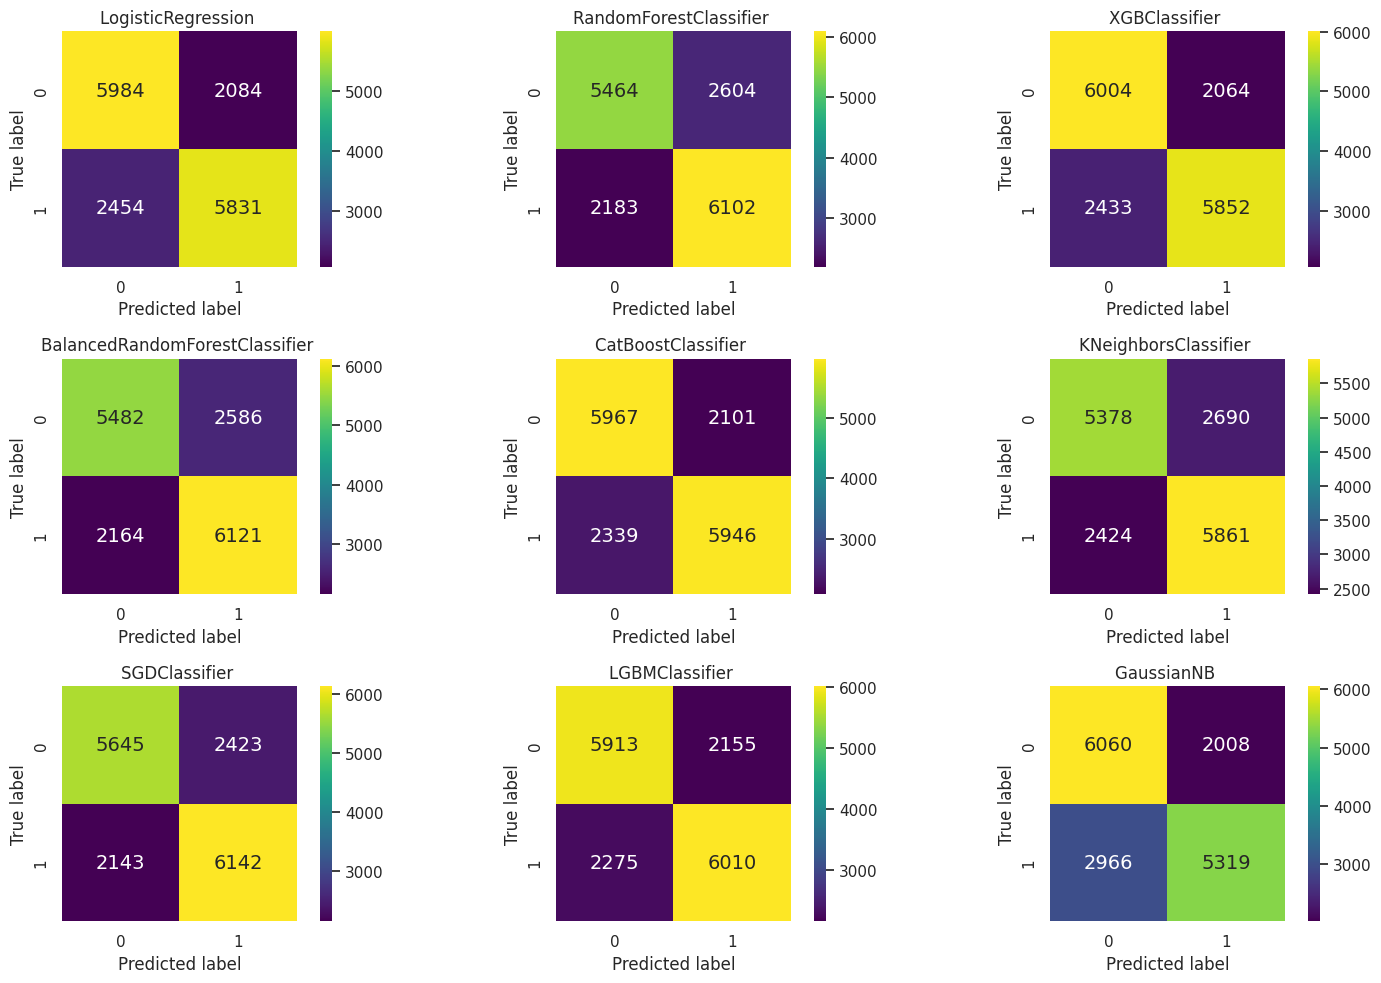

In [ ]:
# sets suplots dimensions
n_rows = 3
n_cols = 3

# plots a confusion matrix for each classifier
gu.plot_multiple_confusion_matrices(n_rows, n_cols, X_test_prep, y_test, classifiers, THRESHOLD)

Although, SGDClassifier has the highest precision and RandomForestClassifier has the highest recall, we're aiming for highest f1-score. Thus, we're moving on with LGBMClassifier.



#### **Probability distribution**

The predict_proba method is being used to generate the predicted probabilities for class 1.

Class 1 refers to the estimated probability or likelihood that a given sample belongs to a specific class,

Let's pick 3 algorithms RandomForestClassifier, SGDClassifier and LGBMClassifier to make some analysis regarding their probabilities distribution

In [ ]:

# instantiates the classifiers
rf_clf = RandomForestClassifier(random_state=SEED)
sgd_clf = SGDClassifier(loss='log', random_state=SEED, n_jobs=-1)
lgbm_clf = LGBMClassifier(random_state=SEED, n_jobs=-1)

# trains the classifiers
rf_clf.fit(X_balanced, np.ravel(y_balanced))
sgd_clf.fit(X_balanced, np.ravel(y_balanced))
lgbm_clf.fit(X_balanced, np.ravel(y_balanced))

# store the predicted probabilities for class 1
y_pred_rf_prob = rf_clf.predict_proba(X_test_prep)[:,1]
y_pred_sgd_prob = sgd_clf.predict_proba(X_test_prep)[:,1]
y_pred_lgbm_prob = lgbm_clf.predict_proba(X_test_prep)[:,1]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


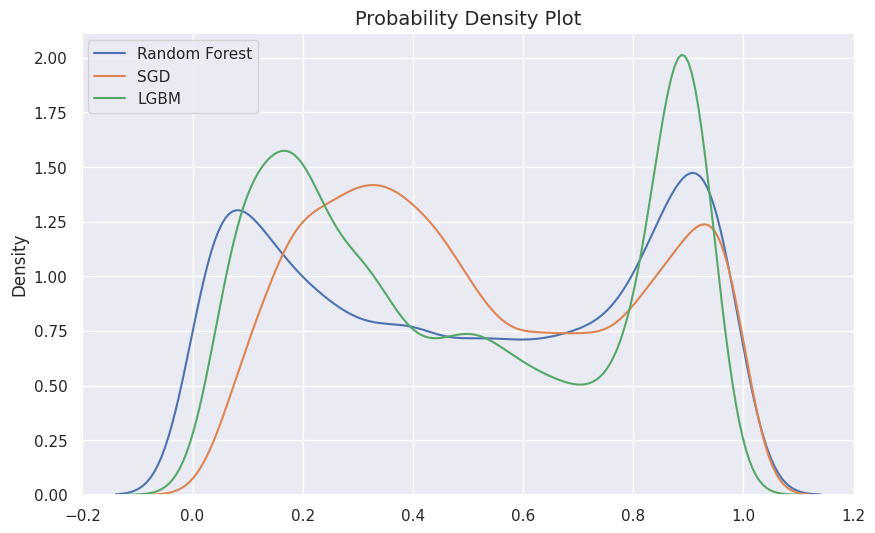

In [ ]:
# sets the plot size
plt.figure(figsize=(10,6))

# plots
sns.kdeplot(y_pred_rf_prob, label='Random Forest')
sns.kdeplot(y_pred_sgd_prob, label='SGD')
sns.kdeplot(y_pred_lgbm_prob, label='LGBM')

# sets the plot features
plt.title("Probability Density Plot", fontsize=14)
plt.legend()

# display the plot
plt.show()

From the analysis, it was observed that LGBM has the highest concentration of predicted probabilities near both 0 and 1, while SGD has a higher concentration near 0 and the lowest concentration near 1.

Conversely, Random Forest has a higher concentration near 1 and a lower concentration near 0 compared to SGD.

However, despite Random Forest's apparent strengths, the decision to continue using LGBM is justified by considering the other metrics analyzed previously, as well as the specific context of the project.

#### **Classification report**

In [ ]:
# makes the predictions
y_pred_rf = rf_clf.predict(X_test_prep)
y_pred_sgd = sgd_clf.predict(X_test_prep)
y_pred_lgbm = lgbm_clf.predict(X_test_prep)

print('Classification Report for ' + type(rf_clf).__name__)
print(classification_report(y_test, y_pred_rf))

print('\nClassification Report for ' + type(sgd_clf).__name__)
print(classification_report(y_test, y_pred_sgd))

print('\nClassification Report for ' + type(lgbm_clf).__name__)
print(classification_report(y_test, y_pred_lgbm))

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      8068
           1       0.72      0.71      0.72      8285

    accuracy                           0.71     16353
   macro avg       0.71      0.71      0.71     16353
weighted avg       0.71      0.71      0.71     16353


Classification Report for SGDClassifier
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      8068
           1       0.74      0.69      0.72      8285

    accuracy                           0.72     16353
   macro avg       0.72      0.72      0.72     16353
weighted avg       0.72      0.72      0.72     16353


Classification Report for LGBMClassifier
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8068
           1       0.76      0.69      0.72      8285

    accuracy                           0.73     16

#### **Hyperparameter Tunning**


Hyperparameter tuning is the process of adjusting the settings of a machine learning algorithm to improve its performance. Machine learning algorithms have hyperparameters, that can be adjusted to optimize the performance of the model. These hyperparameters can affect the accuracy, speed, and robustness of the model.

The goal is to find the optimal settings for these hyperparameters that will produce the best results on the given dataset. This involves trying different combinations of hyperparameter values and evaluating the performance of the model on a validation dataset.

There are several different methods for hyperparameter tuning, including grid search, random search, and Bayesian optimization.

- Grid search involves creating a grid of different hyperparameter values and testing each combination.

- Random search involves randomly selecting hyperparameter values to test.

- Bayesian optimization uses probabilistic models to guide the selection of hyperparameters.

Hyperparameter tuning is an essential step in machine learning because it can significantly improve the performance of a model. A poorly tuned model can lead to poor performance and inaccurate predictions. Hyperparameter tuning helps to ensure that the model is optimized for the specific task and dataset at hand.

In [ ]:
# instantiates the classifier
lgbm_clf = LGBMClassifier(random_state=SEED, n_jobs=-1)

- Hyperparameters are values that are set before training a model that affect how the model learns and makes predictions. For example, the "max_depth" hyperparameter determines the maximum depth of the decision tree that the model can create.

- The code below specifies different values for each hyperparameter. For example, the "max_depth" hyperparameter is being set to a range of values from 2 to 12, incrementing by 2 each time. This means that the model will be trained using decision trees of varying depths, from 2 to 12.

- Similarly, other hyperparameters like "num_leaves", "min_data_in_leaf", "learning_rate", "colsample_bytree", "subsample", and "n_estimators" are being set to different ranges of values.

- Overall, this code is creating a "space" of hyperparameters that can be explored during the process of training a machine learning model, in order to find the combination of hyperparameters that produces the best results.

In [ ]:
# set up space dictionary with specified hyperparameters
space = {'max_depth': np.arange(2, 12, 2),
         'num_leaves': 2 ** np.arange(2, 10, 2),
         'min_data_in_leaf': np.arange(100, 1050, 50),
         'learning_rate': np.linspace(0.001, 0.6, 15),
         'colsample_bytree': np.linspace(0.1, 1, 5),
         'subsample': np.linspace(0.25, 1, 15),
         'n_estimators': np.arange(10, 105, 15)}

- Below, creates an object called lgbm_clf_cv which is used to perform a search for the best parameters of a model. The model being used is called lgbm_clf.

- The search is done randomly and will try 100 different sets of parameters. The parameters that will be searched are defined by the space object.

- The search will be performed using a technique called cross-validation. This means that the data will be split into five groups and the model will be trained on four of the groups and tested on the remaining group. This process will be repeated five times, with each group being used for testing exactly once.

- The quality of the model will be evaluated using a metric called "f1 score". This metric measures the balance between precision and recall, which are two measures of how well the model performs.

- The search will be run with the verbose option set to 2, which means that it will print out information about each iteration. The n_jobs option is set to -1, which means that the search will use all available CPU cores to speed up the process.

- Finally, the random_state option is set to a specific number called SEED, which ensures that the search will be reproducible.

In [ ]:
# prepares RandomizedSearchCV object
lgbm_clf_cv = RandomizedSearchCV(estimator=lgbm_clf, param_distributions=space,
                                scoring='f1', n_iter=100, cv=5, verbose=2,
                                random_state=SEED, n_jobs=-1)

In [ ]:
# fits the RandomizedSearchCV object
lgbm_clf_cv.fit(X_balanced, np.ravel(y_balanced))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                                        'learning_rate': array([0.001     , 0.04378571, 0.08657143, 0.12935714, 0.17214286,
       0.21492857, 0.25771429, 0.3005    , 0.34328571, 0.38607143,
       0.42885714, 0.47164286, 0.51442857, 0.55721429, 0.6       ]),
                                        'max_depth': arra...
                                        'min_data_in_leaf': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000]),
                                        'n_estimators': array([ 10,  25,  40,  55,  70,  85, 100]),
                                        'num_leaves': array([  4,  16,  64, 256]),
                                        'subsample': array([0.25      , 0.30357143, 0.35714286, 0.41071429, 0.46428571,
       0.51785714, 0.57142857, 0.625     , 0.67857143, 0.73214286,
       0.78571429, 0.83928571, 0.89285714, 0.94642857, 1.        ])},
                   random_state=42, scoring='f1', verbose=2)

The purpose is to search through different combinations of hyperparameters (settings for the model) to find the ones that work best for the given data set.

The "fit" method is used to actually train the model on the data. In this case, the "X_balanced" variable represents the input data (also known as the features) and "y_balanced" represents the output data (also known as the target or labels).

And then converts the output data to a 1-dimensional array, which is often required by machine learning algorithms.

Overall, training a machine learning model using the LightGBM library and a randomized search through different hyperparameter combinations to find the best settings for the model.

In [ ]:
# best estimator
lgbm_clf_cv.best_estimator_

LGBMClassifier(learning_rate=0.34328571428571425, max_depth=10,
               min_data_in_leaf=150, n_estimators=40, num_leaves=16,
               random_state=42, subsample=0.6785714285714286)

#### **Predictions & Metrics**

In [ ]:

# sets the threshold
THRESHOLD = 0.45

# extract the best estimator
lgbm_tuned_model = lgbm_clf_cv.best_estimator_

# calculates classifiers performance
df_performance = gu.get_classifiers_performance(X_balanced, X_test_prep,
                                                np.ravel(y_balanced), np.ravel(y_test),
                                                THRESHOLD, [lgbm_tuned_model])

df_performance

Training LGBMClassifier...


,model,precision,recall,f1-Score,ROC AUC,accuracy,cohen kappa
0,LGBMClassifier,0.733949,0.728546,0.731238,0.795555,0.728674,0.457305


In [ ]:
# Print the tuned parameters and score
print("\nTuned Parameters: {}".format(lgbm_clf_cv.best_params_))
print("\nBest score: {:.4f}".format(lgbm_clf_cv.best_score_))


Tuned Parameters: {'subsample': 0.6785714285714286, 'num_leaves': 16, 'n_estimators': 40, 'min_data_in_leaf': 150, 'max_depth': 10, 'learning_rate': 0.34328571428571425, 'colsample_bytree': 1.0}

Best score: 0.7817


### **Conclusion**

Now recapping the pricing model for a diagnosis in a clinic that checks for cardiovascular disease. The price that the client pays for the diagnosis varies based on the precision achieved by the team of specialists.

If the precision achieved by the specialists is above 50%, the client will pay a minimum of $500,

plus an additional $500 for each additional 5% precision.

For example, if the precision achieved is 55%, the client will pay $1,000. If the precision achieved is up to 50%, the client will not be charged anything.

A model has been developed that can diagnose cardiovascular disease with a precision ranging from 74.54% to 76.6%, which is higher than the 55% to 65% achieved by today's procedures.

If a portfolio of 70,000 patients were to go through the clinical procedure using the new model, in the worst-case scenario, it would generate a profit of $171.7 million,

and in the best scenario, it would generate a profit of $186.2 million.

In contrast, using today's procedure, the best-case scenario would generate $105 million in profit.

Therefore, the new model could potentially generate an additional $81.2 million in profit, representing a 77.3% increase over today's procedure.




#### **References**


1. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

2. https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

3. https://www.sciencedirect.com/topics/engineering/hypothesis-generation

4. https://towardsdatascience.com/feature-engineering-what-powers-machine-learning-93ab191bcc2d

5. https://medium.com/cometheartbeat/a-practical-guide-to-feature-engineering-in-python-8326e40747c8


6. https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

7. https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24

8. https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

9. https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624

10. https://machinelearningmastery.com/logistic-regression-for-machine-learning/

11. https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

12. https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

13. https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

14. https://catboost.ai/en/docs/

15. https://scikit-learn.org/stable/modules/neighbors.html

16. https://scikit-learn.org/stable/modules/sgd.html

17. https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html

18. https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

20. https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

21. https://towardsdatascience.com/hyperparameter-tuning-a-practical-guide-and-template-b3bf0504f095

22. https://www.statology.org/univariate-analysis/

23. https://www.datacamp.com/tutorial/exploratory-data-analysis-python

24. https://medium.com/@mukut-da20/univariate-bivariate-and-multivariate-analysis-using-python-fb30edb6d2e1

25. https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

26. https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

27. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

28. https://medium.com/@kumarvaishnav17/standardization-vs-normalization-in-machine-learning-3e132a19c8bf

29. https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/

30. https://www.blog.trainindata.com/mastering-data-preprocessing-techniques/

31. https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

32. https://medium.com/analytics-vidhya/different-type-of-feature-engineering-encoding-techniques-for-categorical-variable-encoding-214363a016fb

33. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

34. https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc



### **Licensing and Citation**

Copyright (c) 2023 Sonali Bandi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
